<center><img src="img/EdTech_logo.png" style="width: 500px;"/></center>

Notre start-up de la EdTech, nommée **academy**, propose des contenus de formation en ligne pour un public de niveau lycée et université. Dans le cadre de notre projet d’expansion à l’international de l’entreprise, nous avons réalisé une analyse exploratoire, pour déterminer si les données sur l’éducation de la banque mondiale permettent d’informer sur ce projet.  

**Les objectifs sont :**
- Déterminer les pays avec un fort potentiel de clients pour nos services.
- Évaluer l’évolution de ce potentiel de clients.
- Les pays dans lesquels l'entreprise doit opérer en priorité.


**Les données :**

Les données que nous utiliserons proviennent de la Banque mondiale **The World Bank** “EdStats All Indicator Query” disponible à l'adresse suivante :  https://datacatalog.worldbank.org/dataset/education-statistics . Elle répertorie 4000 indicateurs internationaux décrivant l’accès à l’éducation, l’obtention de diplômes et des informations relatives aux professeurs, aux dépenses liées à l’éducation.

Nous disposons de 5 fichiers :

<center><img src="img/Vue_ens_fichiers.png" style="width: 1000px;"/></center>

**Les indicateurs :**

Pour répondre à nos objectifs, nous allons choisir des indicateurs qui pourront apporter une aide dans la segmentation des populations. Nous choisissons 3 axes :
- Population étudiante.
- PIB moyen (pouvoir d'achat).
- Connectivité à internet.

Nous allons donc :  
- Valider la qualité de ce jeu de données (comporte-t-il beaucoup de données manquantes, dupliquées ?)
- Décrire les informations contenues dans le jeu de données (nombre de colonnes ? nombre de lignes ?)
- Sélectionner les informations qui semblent pertinentes pour répondre à la problématique (quelles sont les colonnes contenant des informations qui peuvent être utiles pour répondre à la problématique de l’entreprise ?)
- Déterminer des ordres de grandeurs des indicateurs statistiques classiques pour les différentes zones géographiques et pays du monde (moyenne/médiane/écart-type par pays et par continent ou bloc géographique)

---

# Importation des librairies

- Installer de la librairie seaborn :

In [1]:
!pip install seaborn

- Importation des librairies :

In [2]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore')

# Pandas settings
pd.set_option("display.max_columns", 50)
pd.set_option("display.max_rows", 100)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
pd.options.display.float_format = '{:.2f}'.format


# plot config
sns.set_theme(
    style = "whitegrid",
    font_scale = 1.2,
    rc = {
        "figure.figsize" : (15,10),
        "axes.titlepad": 20,
        "axes.labelweight": "bold",
        "axes.labelsize": 12,
        "axes.titleweight": "bold",
        "axes.titlesize": 18,
        "axes.titlepad": 20,
        'figure.figsize':(12,6)
    }
)
palette = "GnBu_r"
color = "#539ebb"

Versions :

In [3]:
print('Version des librairies utilisées :')
print('Python   : ' + sys.version)
print('NumPy    : ' + np.version.full_version)
print('Pandas   : ' + pd.__version__)
print('Seaborn  : ' + sns.__version__)

Version des librairies utilisées :
Python   : 3.8.12 (default, Oct 12 2021, 06:23:56) 
[Clang 10.0.0 ]
NumPy    : 1.20.3
Pandas   : 1.4.1
Seaborn  : 0.11.2


Style des tableaux :

In [4]:
%%html
<style>
    table {float:left}
</style>

---

# Importation des données

## Données EdStatsData

EdStatsData contient des valeurs par indicateurs, par an et par pays.

In [5]:
df_stats = pd.read_csv('data/EdStatsData.csv')
df_stats.sample(2)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
459930,Kenya,KEN,PASEC: Distribution of 6th grade reading scores: 1st Percentile Score,LO.PASEC.REA.6.P1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
631710,Oman,OMN,"Gross enrolment ratio, primary to tertiary, male (%)",UIS.GER.1T6.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.25,30.14,31.76,33.98,35.86,39.36,42.28,45.63,47.98,50.13,51.92,53.90,56.18,57.80,59.01,60.37,61.55,62.87,65.07,63.41,63.57,NaN,NaN,NaN,NaN,71.64,NaN,71.18,70.08,69.45,NaN,76.18,NaN,75.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
!head -1 data/EdStatsData.csv

﻿"Country Name","Country Code","Indicator Name","Indicator Code","1970","1971","1972","1973","1974","1975","1976","1977","1978","1979","1980","1981","1982","1983","1984","1985","1986","1987","1988","1989","1990","1991","1992","1993","1994","1995","1996","1997","1998","1999","2000","2001","2002","2003","2004","2005","2006","2007","2008","2009","2010","2011","2012","2013","2014","2015","2016","2017","2020","2025","2030","2035","2040","2045","2050","2055","2060","2065","2070","2075","2080","2085","2090","2095","2100",


> La colonne "Unnamed: 69" s'explique par la présence d'un séparateur à la fin de chaque ligne. Il s'agit d'un souci de formatage du fichier csv.

In [7]:
df_stats = df_stats.drop(columns='Unnamed: 69')

### Description des données

| Variables | Définition |
| --- | --- |
| Country Name | Nom du pays (ou de la région) |
| Country Code | Code du pays |
| Indicator Name | Nom de l'indicateur |
| Indicator Code | Code de l'indicateur |
| 1970-2100 | Valeurs par années |

In [8]:
print("")
print("EdStatsData")
print("----------------------------------")
print("{} entrées et {} variables.".format(df_stats.shape[0],df_stats.shape[1]))

duplicates = df_stats.duplicated(subset=["Country Code","Indicator Code"], keep='first')
if duplicates.any():
    print("Présence de données dupliquées.")
else:
    print("Absence de données dupliquées.")

print("{} Country Code référencés.".format(len(df_stats['Country Code'].unique())))
print("{} indicateurs uniques.".format(len(df_stats['Indicator Code'].unique())))
print("")


EdStatsData
----------------------------------
886930 entrées et 69 variables.
Absence de données dupliquées.
242 Country Code référencés.
3665 indicateurs uniques.



### Données manquantes

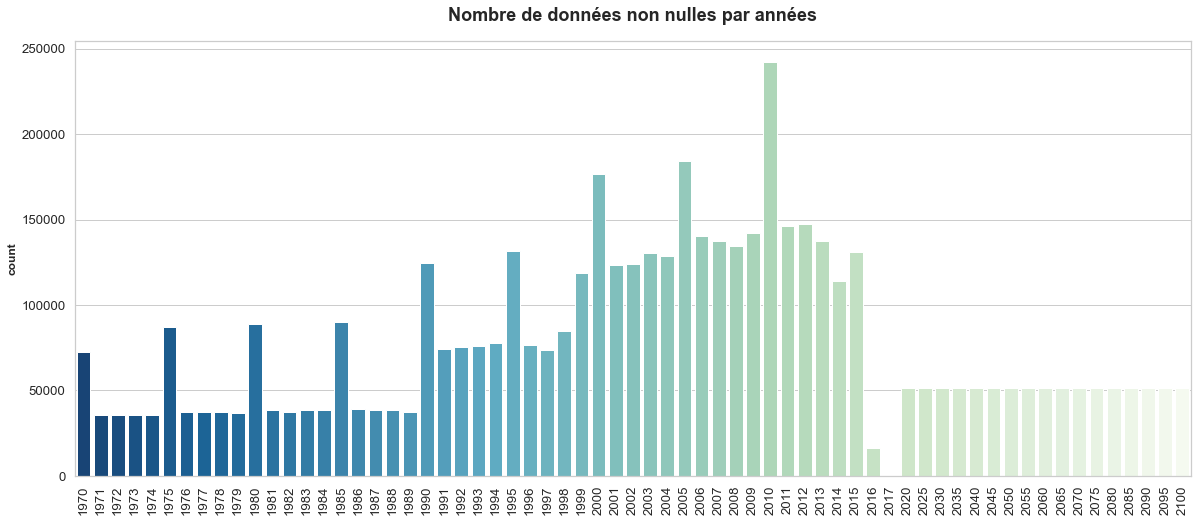

In [9]:
plt.figure(figsize=(20, 8))
ax = sns.countplot(data=df_stats, palette="GnBu_r")
ax.set_title('Nombre de données non nulles par années')
ax.tick_params(axis='x', labelrotation=90)
plt.show()

Les années 2016 et 2017 ne présentent pas un nombre de données suffisantes. Les années de 2020 à 2100 semblent être des données prédictives.
> Nous allons garder comme plage d'année **2000 à 2015** au vu du nombre de leurs valeurs nulles.  

## Données EdStatsSeries

EdStatsSeries contient des informations sur les indicateurs. Nous allons voir quelles informations peuvent être retenus pour nous aider dans le traitement de nos indicateurs.

In [10]:
df_stats_series = pd.read_csv('data/EdStatsSeries.csv')
df_stats_series.head(2)

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age 15-19 with no education,Percentage of female population age 15-19 with no education,Percentage of female population age 15-19 with no education,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.barrolee.com/,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 with no education,Percentage of population age 15-19 with no education,Percentage of population age 15-19 with no education,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.barrolee.com/,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
!head -1 data/EdStatsSeries.csv

﻿"Series Code","Topic","Indicator Name","Short definition","Long definition","Unit of measure","Periodicity","Base Period","Other notes","Aggregation method","Limitations and exceptions","Notes from original source","General comments","Source","Statistical concept and methodology","Development relevance","Related source links","Other web links","Related indicators","License Type",


> La colonne "Unnamed: 20" s'explique aussi par la présence d'un séparateur à la fin de chaque ligne. Il s'agit là aussi d'un souci de formatage du fichier csv.

In [12]:
df_stats_series = df_stats_series.drop(columns='Unnamed: 20')

### Description des données

In [13]:
print(df_stats_series.info())

print("")
print("EdStatsSeries")
print("----------------------------------")
print("{} entrées et {} variables.".format(df_stats_series.shape[0],df_stats_series.shape[1]))

duplicates = df_stats_series.duplicated(subset=["Series Code"], keep='first')
if duplicates.any():
    print("Présence de données dupliquées.")
else:
    print("Absence de données dupliquées.")

print("Nombre de Topic : {}".format(len(df_stats_series['Topic'].unique())))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Series Code                          3665 non-null   object 
 1   Topic                                3665 non-null   object 
 2   Indicator Name                       3665 non-null   object 
 3   Short definition                     2156 non-null   object 
 4   Long definition                      3665 non-null   object 
 5   Unit of measure                      0 non-null      float64
 6   Periodicity                          99 non-null     object 
 7   Base Period                          314 non-null    object 
 8   Other notes                          552 non-null    object 
 9   Aggregation method                   47 non-null     object 
 10  Limitations and exceptions           14 non-null     object 
 11  Notes from original source    

### Données manquantes

Nous gardons les colonnes qui contiennent suffisamment de données.

In [14]:
df_stats_series_selected = df_stats_series.drop(columns = df_stats_series.loc[:,'Unit of measure':'General comments'])
df_stats_series_selected = df_stats_series_selected.drop(columns=df_stats_series_selected.loc[:,'Statistical concept and methodology':'License Type'])

In [15]:
df_stats_series_selected.head(1)

,Series Code,Topic,Indicator Name,Short definition,Long definition,Source
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age 15-19 with no education,Percentage of female population age 15-19 with no education,Percentage of female population age 15-19 with no education,Robert J. Barro and Jong-Wha Lee: http://www.barrolee.com/


## Données EdStatsCountry

In [16]:
df_country = pd.read_csv('data/EdStatsCountry.csv')
df_country.head(2)

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,National accounts base year,National accounts reference year,SNA price valuation,Lending category,Other groups,System of National Accounts,Alternative conversion factor,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from official government statistics; 1994-1999 from UN databases. Base year has changed from 1995 to 2000.,Latin America & Caribbean,High income: nonOECD,AW,2000,NaN,Value added at basic prices (VAB),NaN,NaN,Country uses the 1993 System of National Accounts methodology.,NaN,NaN,"IMF Balance of Payments Manual, 6th edition.",NaN,Special trade system,NaN,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.00,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period for national accounts data: FY (from 2013 are CY). National accounts data are sourced from the IMF and differ from the Central Statistics Organization numbers due to exclusion of the opium economy.,South Asia,Low income,AF,2002/03,NaN,Value added at basic prices (VAB),IDA,HIPC,Country uses the 1993 System of National Accounts methodology.,NaN,NaN,NaN,Actual,General trade system,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.00,2000,NaN


In [17]:
!head -1 data/EdStatsCountry.csv

﻿"Country Code","Short Name","Table Name","Long Name","2-alpha code","Currency Unit","Special Notes","Region","Income Group","WB-2 code","National accounts base year","National accounts reference year","SNA price valuation","Lending category","Other groups","System of National Accounts","Alternative conversion factor","PPP survey year","Balance of Payments Manual in use","External debt Reporting status","System of trade","Government Accounting concept","IMF data dissemination standard","Latest population census","Latest household survey","Source of most recent Income and expenditure data","Vital registration complete","Latest agricultural census","Latest industrial data","Latest trade data","Latest water withdrawal data",


> La colonne "Unnamed: 31" s'explique aussi par la présence d'un séparateur à la fin de chaque ligne. Il s'agit d'un souci de formatage du fichier csv.

In [18]:
df_country = df_country.drop(columns='Unnamed: 31')

### Description des données

In [19]:
print(df_country.info())

print("")
print("EdStatsCountry")
print("----------------------------------")
print("{} entrées et {} variables.".format(df_country.shape[0],df_country.shape[1]))

duplicates = df_country.duplicated(subset=["Country Code"], keep='first')
if duplicates.any():
    print("Présence de données dupliquées.")
else:
    print("Absence de données dupliquées.")

print("{} Country Code référencés.".format(len(df_country['Country Code'].unique())))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 31 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country Code                                       241 non-null    object 
 1   Short Name                                         241 non-null    object 
 2   Table Name                                         241 non-null    object 
 3   Long Name                                          241 non-null    object 
 4   2-alpha code                                       238 non-null    object 
 5   Currency Unit                                      215 non-null    object 
 6   Special Notes                                      145 non-null    object 
 7   Region                                             214 non-null    object 
 8   Income Group                                       214 non-null    object 
 9   WB-2 code 

### Données manquantes

In [20]:
df_country.isnull().sum()

Country Code                                           0
Short Name                                             0
Table Name                                             0
Long Name                                              0
2-alpha code                                           3
Currency Unit                                         26
Special Notes                                         96
Region                                                27
Income Group                                          27
WB-2 code                                              1
National accounts base year                           36
National accounts reference year                     209
SNA price valuation                                   44
Lending category                                      97
Other groups                                         183
System of National Accounts                           26
Alternative conversion factor                        194
PPP survey year                

> Nous observons qu'il y a 27 valeurs manquantes pour la variable "Region". Le nombre d'entrées est de 241, or selon l'ONU, il y a 197 États dans le monde. La liste des "Country" sans nom de région, semblerait donc indiquer qu'il s'agit de régions.

**Données de régions :**

In [21]:
list_region_income_group = df_country[df_country['Region'].isnull()]['Short Name'].unique()

list_income_groups = [x for x in list_region_income_group if x.endswith('income')]
list_regions = [x for x in list_region_income_group if not x.endswith('income')]

print("")
print("Il y a {} 'Country Code' référencés.".format(len(df_country['Country Code'].unique())))
print("Nombre d'entreés ne possédant pas de région : {}".format(len(list_region_income_group)))

print("")
print("Liste des income levels :")
print("----------------------------------")
print(*list_income_groups, sep = "\n")

print("")
print("Liste des régions :")
print("----------------------------------")
print(*list_regions, sep = "\n")


Il y a 241 'Country Code' référencés.
Nombre d'entreés ne possédant pas de région : 27

Liste des income levels :
----------------------------------
High income
Low income
Lower middle income
Low & middle income
Middle income
Upper middle income

Liste des régions :
----------------------------------
Arab World
East Asia & Pacific (developing only)
East Asia & Pacific (all income levels)
Europe & Central Asia (developing only)
Europe & Central Asia (all income levels)
Euro area
European Union
Gibraltar
Heavily indebted poor countries (HIPC)
Latin America & Caribbean (developing only)
Latin America & Caribbean (all income levels)
Least developed countries: UN classification
Middle East & North Africa (all income levels)
Middle East & North Africa (developing only)
North America
Nauru
OECD members
South Asia
Sub-Saharan Africa (developing only)
Sub-Saharan Africa (all income levels)
World


In [22]:
country_by_income_grp = df_country.groupby('Income Group')[['Short Name']].count().reset_index()
country_by_income_grp = country_by_income_grp.sort_values(by='Short Name', ascending=False)

country_by_region = df_country.groupby('Region')[['Short Name']].count().reset_index()
country_by_region = country_by_region.sort_values(by='Short Name', ascending=False)
print(country_by_region.head(5))

                       Region  Short Name
1       Europe & Central Asia          57
6          Sub-Saharan Africa          48
2   Latin America & Caribbean          41
0         East Asia & Pacific          36
3  Middle East & North Africa          21


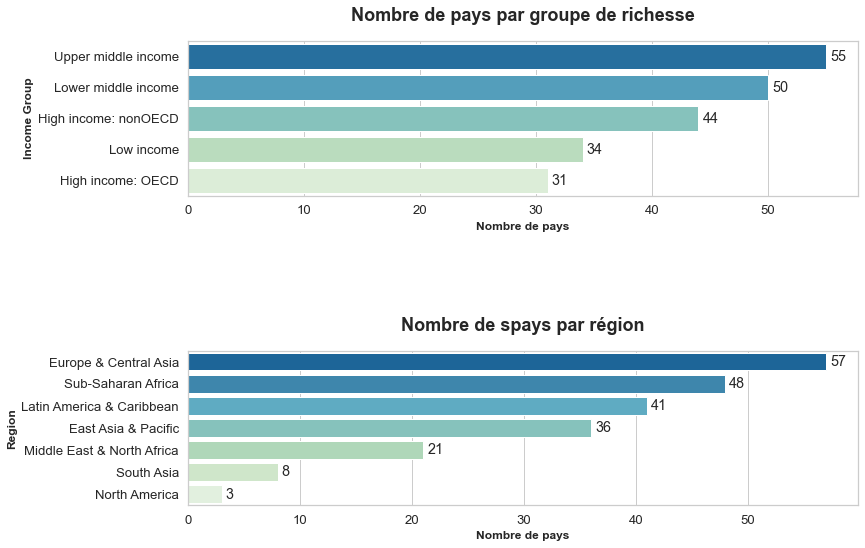

In [23]:
plt.subplot(2,1,1)
ax = sns.barplot(data=country_by_income_grp, x="Short Name", y="Income Group", palette="GnBu_r")
ax.set_title('Nombre de pays par groupe de richesse')
ax.set(xlabel='Nombre de pays')

for container in ax.containers:
    ax.bar_label(container, padding = 4)

plt.subplot(2,1,2)
ax = sns.barplot(data=country_by_region, x="Short Name", y="Region", palette="GnBu_r")
ax.set_title('Nombre de spays par région')
ax.set(xlabel='Nombre de pays')

for container in ax.containers:
    ax.bar_label(container, padding = 4)

plt.subplots_adjust(top=1.2, hspace = 1, wspace = 1)
plt.show()

> Nous pouvons utiliser les données **EdStatsCountry** pour segmenter nos données **EdStatsData** par pays et par régions.

## Données EdStatsCountrySeries

In [24]:
df_country_series = pd.read_csv('data/EdStatsCountry-Series.csv')
df_country_series.head()

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population Prospects,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population Prospects,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population Prospects,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population Prospects,NaN


In [25]:
!head -1 data/EdStatsCountry-Series.csv

﻿"CountryCode","SeriesCode","DESCRIPTION",


> La colonne "Unnamed: 3" s'explique aussi par la présence d'un séparateur à la fin de chaque ligne. Il s'agit d'un souci de formatage du fichier csv.

In [26]:
df_country_series = df_country_series.drop(columns='Unnamed: 3')

### Description des données

In [27]:
df_country_series.info()

print("")
print("EdStatsCountry-Series")
print("----------------------------------")
print("{} entrées et {} variables.".format(df_country_series.shape[0],df_country_series.shape[1]))

duplicates = df_country_series.duplicated(subset=["CountryCode"], keep='first')
if duplicates.any():
    print("Présence de données dupliquées.")
else:
    print("Absence de données dupliquées.")

print("{} Country Code référencés.".format(len(df_country_series['CountryCode'].unique())))

list_country_series_code = list(df_country_series['SeriesCode'].unique())
print("{} indicateurs uniques.".format(len(list_country_series_code)))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CountryCode  613 non-null    object
 1   SeriesCode   613 non-null    object
 2   DESCRIPTION  613 non-null    object
dtypes: object(3)
memory usage: 14.5+ KB

EdStatsCountry-Series
----------------------------------
613 entrées et 3 variables.
Présence de données dupliquées.
211 Country Code référencés.
21 indicateurs uniques.


### Données manquantes

In [28]:
# List of indicators
print(list_country_series_code)

['SP.POP.TOTL', 'SP.POP.GROW', 'NY.GDP.PCAP.PP.CD', 'NY.GDP.MKTP.PP.KD', 'NY.GNP.MKTP.PP.CD', 'NY.GDP.MKTP.PP.CD', 'NY.GDP.PCAP.PP.KD', 'NY.GNP.PCAP.PP.CD', 'SP.POP.1564.TO.ZS', 'SP.POP.TOTL.MA.ZS', 'SP.POP.TOTL.FE.ZS', 'SP.POP.0014.TO.ZS', 'NY.GNP.PCAP.CD', 'NY.GDP.PCAP.CD', 'NY.GDP.PCAP.KD', 'SP.POP.1564.MA.IN', 'SP.POP.0014.TO', 'SP.POP.1564.TO', 'SP.POP.1564.FE.IN', 'SP.POP.0014.MA.IN', 'SP.POP.0014.FE.IN']


In [29]:
countries_by_indicator = df_country_series.groupby('SeriesCode').count().reset_index()
countries_by_indicator = countries_by_indicator.sort_values(by='CountryCode', ascending=False)

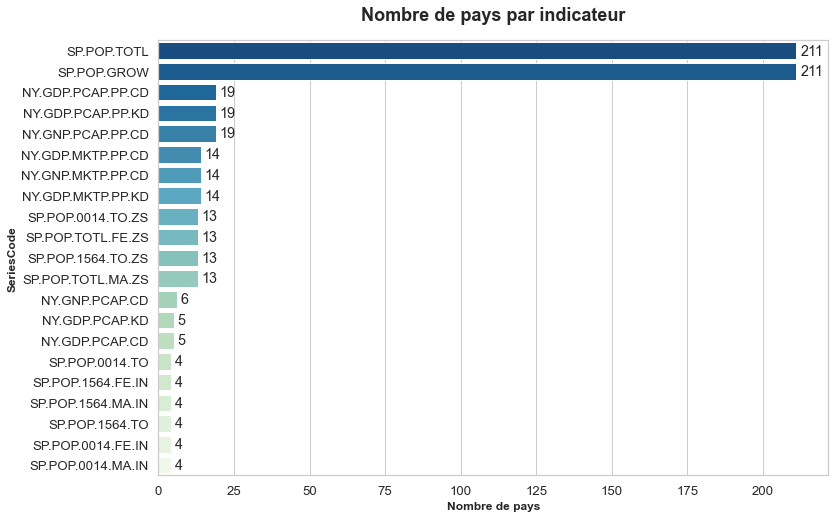

In [30]:
plt.figure(figsize=(12,8))
ax = sns.barplot(data=countries_by_indicator, x="CountryCode", y="SeriesCode", palette="GnBu_r")
ax.set_title('Nombre de pays par indicateur')
ax.set(xlabel='Nombre de pays')

for container in ax.containers:
    ax.bar_label(container, padding = 4)

plt.show()

> Nous garderons pour notre analyse les indicateurs **SP.POP.TOTL** et **SP.POP.GROW**.

In [31]:
list_country_series_code.remove('SP.POP.TOTL')
list_country_series_code.remove('SP.POP.GROW')

df_stats_selected = df_stats[~df_stats['Indicator Code'].isin(list_country_series_code)]

## Données EdStatsFootNote

In [32]:
df_foot_note = pd.read_csv('data/EdStatsFootNote.csv')
df_foot_note.head()

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN


In [33]:
!head -1 data/EdStatsFootNote.csv

﻿"CountryCode","SeriesCode","Year","DESCRIPTION",


> La colonne "Unnamed: 4" s'explique aussi par la présence d'un séparateur à la fin de chaque ligne. Il s'agit d'un souci de formatage du fichier csv.

In [34]:
df_foot_note = df_foot_note.drop(columns='Unnamed: 4')

### Description des données

In [35]:
print(df_foot_note.info())

print("")
print("EdStatsFootNote")
print("----------------------------------")
print("{} entrées et {} variables.".format(df_foot_note.shape[0],df_foot_note.shape[1]))

duplicates = df_foot_note.duplicated(subset=["CountryCode"], keep='first')
if True in list(duplicates.unique()):
    print("Présence de données dupliquées.")
else:
    print("Absence de données dupliquées.")

print("{} Country Code référencés.".format(len(df_foot_note['CountryCode'].unique())))

list_foot_note_series_code = list(df_foot_note['SeriesCode'].unique())
print("{} indicateurs uniques.".format(len(list_foot_note_series_code)))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643638 entries, 0 to 643637
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   CountryCode  643638 non-null  object
 1   SeriesCode   643638 non-null  object
 2   Year         643638 non-null  object
 3   DESCRIPTION  643638 non-null  object
dtypes: object(4)
memory usage: 19.6+ MB
None

EdStatsFootNote
----------------------------------
643638 entrées et 4 variables.
Présence de données dupliquées.
239 Country Code référencés.
1558 indicateurs uniques.


### Répartition des données

In [36]:
df_foot_note_by_year = df_foot_note
df_foot_note_by_year['year_formated'] = df_foot_note_by_year['Year'].apply(lambda x : x[-4:]).astype('int')
df_foot_note_by_year = df_foot_note_by_year.groupby('year_formated').count().reset_index()

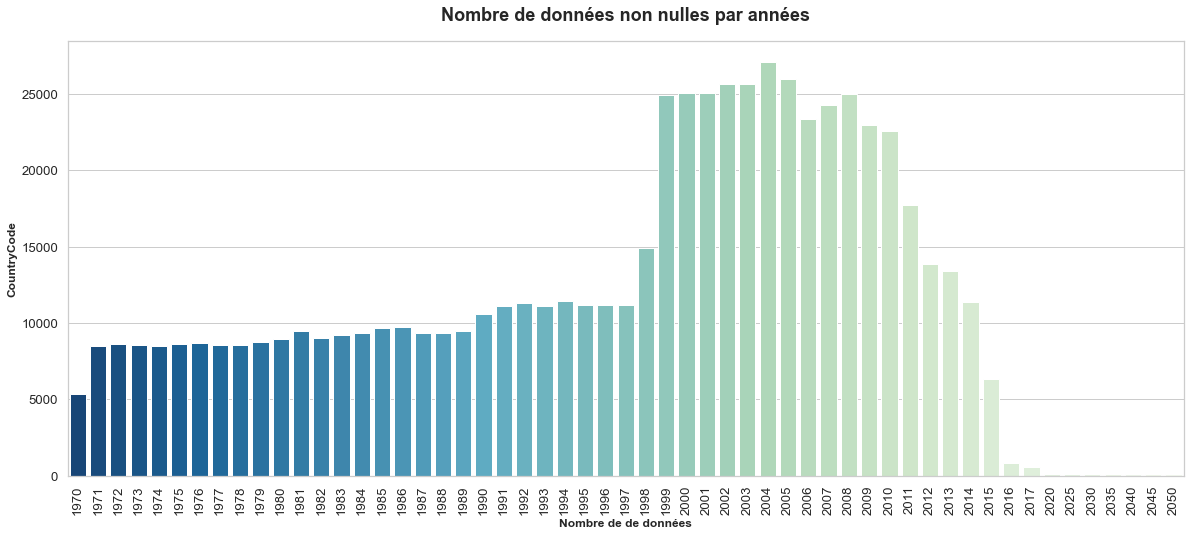

In [37]:
plt.figure(figsize=(20, 8))
ax = sns.barplot(x="year_formated", y="CountryCode", data=df_foot_note_by_year, palette="GnBu_r")
ax.set_title('Nombre de données non nulles par années')
ax.set(xlabel='Years')
ax.set(xlabel='Nombre de de données')
ax.tick_params(axis='x', labelrotation=90)
plt.show()

In [38]:
foot_note_countries_by_indicator = df_foot_note.groupby('SeriesCode')[['CountryCode']].count().reset_index()
foot_note_countries_by_indicator = foot_note_countries_by_indicator.sort_values(by='CountryCode', ascending=False)
foot_note_countries_by_indicator = foot_note_countries_by_indicator.head(15)

> Les données sont plus renseignées pour les années de **2000 à 2014**. 

## Résumé des données

In [39]:
files = os.listdir("data/")

list_filename = [
    'EdStatsData.csv',
    'EdStatsSeries.csv',
    'EdStatsCountry.csv',
    'EdStatsCountry-Series.csv',
    'EdStatsFootNote.csv'
]

file_description = pd.DataFrame(list_filename, columns=["Fichiers"])

file_description['Nombre de colonnes'] = [
    df_stats.shape[1],
    df_stats_series.shape[1],
    df_country.shape[1],
    df_country_series.shape[1],
    df_foot_note.shape[1]
]

file_description['Nombre de lignes'] = [
    df_stats.shape[0],
    df_stats_series.shape[0],
    df_country.shape[0],
    df_country_series.shape[0],
    df_foot_note.shape[0]
]

file_description

,Fichiers,Nombre de colonnes,Nombre de lignes
0,EdStatsData.csv,69,886930
1,EdStatsSeries.csv,20,3665
2,EdStatsCountry.csv,31,241
3,EdStatsCountry-Series.csv,3,613
4,EdStatsFootNote.csv,5,643638


# Nettoyage des données et sélection des indicateurs

## Initialisation et données de travail

### Sélection des années

Nous avons sélectionné les années de 2000 à 2015 pour les données EdStatsData :

In [40]:
df_stats_selected = df_stats_selected.drop(columns = df_stats_selected.loc[:,'1970':'1999'])
df_stats_selected = df_stats_selected.drop(columns=df_stats_selected.loc[:,'2016':'2100'])

> Nous avons maintenant des données sur une période ciblée. Il y a cependant un grand nombre d'indicateurs par Country Code et de valeurs manquantes. Nous devons sélectionner les indicateurs les plus pertinents qui participeront à répondre à nos problématiques.

### Merge EdStatsData,EdStatsCountry et EdStatsSeries

**- Merge EdStatsCountry:**

On récupère ici les régions des pays et leurs groupes de 'income'.

In [41]:
df_country_clean = df_country[['Country Code', 'Region', 'Income Group']]
df_country_clean.head()

,Country Code,Region,Income Group
0,ABW,Latin America & Caribbean,High income: nonOECD
1,AFG,South Asia,Low income
2,AGO,Sub-Saharan Africa,Upper middle income
3,ALB,Europe & Central Asia,Upper middle income
4,AND,Europe & Central Asia,High income: nonOECD


In [42]:
df_stats_s_all = df_country_clean.merge(df_stats_selected, how='left', on='Country Code')

**- Merge EdStatsSeries:**

On récupère ici les informations sur les différents indicateurs.

In [43]:
df_stats_series_selected.rename(columns = {'Series Code' : 'Indicator Code'}, inplace=True)
df_stats_s_all = df_stats_s_all.merge(
    df_stats_series_selected, how='inner', on='Indicator Code')

df_stats_s_all = df_stats_s_all.drop(columns=['Indicator Name_y'])
df_stats_s_all.rename(columns = {'Indicator Name_x' : 'Indicator Name'}, inplace=True)

In [44]:
df_stats_s_all.sample(1)

,Country Code,Region,Income Group,Country Name,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,Topic,Short definition,Long definition,Source
77057,PRK,East Asia & Pacific,Low income,"Korea, Dem. People’s Rep.",Barro-Lee: Percentage of female population age 40-44 with tertiary schooling. Completed Tertiary,BAR.TER.CMPT.4044.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Attainment,Percentage of female population age 40-44 with tertiary schooling. Completed Tertiary,Percentage of female population age 40-44 with tertiary schooling. Completed Tertiary,Robert J. Barro and Jong-Wha Lee: http://www.barrolee.com/


### Suppression des lignes vide

Afin de limiter le nombre total d'indicateurs à analyser, on commence par supprimer les indicateurs n'ayant pas de valeurs sur nos années sélectionnées.

In [45]:
list_columns = list(df_stats_s_all.loc[:,"2000":"2015"])
df_stats_s_all = df_stats_s_all.dropna(how="all", subset=list_columns)

### Données de travail

**- Données par pays :**

In [46]:
df_stats_p = df_stats_s_all[df_stats_s_all['Region'].notnull()]

print("Nombre de Pays : {}".format(len(df_stats_p['Country Code'].unique())))

Nombre de Pays : 214


**- Données par région :**

In [47]:
df_stats_r = df_stats_s_all[df_stats_s_all['Region'].isnull()]   

print("Nombre de Régions : {}".format(len(df_stats_r['Country Code'].unique())))

Nombre de Régions : 27


On fusionne les données de EdStatsData avec EdStatsSeries. Cela permets d'inclure les définitions des indicateurs dans notre datafarme de travail.

### Fonction de calcul de taux d'indicateurs

L'idée est de faire un premier filtrage des données en fonction de leurs taux de remplissage par pays.

**- Nombre de valeurs par pays :**

In [48]:
df_stats_p_values = df_stats_p.loc[:,'2000':'2015']
df_stats_p['not_null_values'] = df_stats_p_values.count(axis=1)
df_stats_p.sample(1)

,Country Code,Region,Income Group,Country Name,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,Topic,Short definition,Long definition,Source,not_null_values
906,QAT,Middle East & North Africa,High income: nonOECD,Qatar,"Adjusted net enrolment rate, lower secondary, male (%)",UIS.NERA.2.M,NaN,72.93,84.94,NaN,92.87,92.89,88.92,88.19,NaN,93.23,87.60,94.46,NaN,NaN,NaN,NaN,Secondary,NaN,"Total number of male students of the official lower secondary school age group who are enrolled in lower secondary education or higher, expressed as a percentage of the corresponding male population. Divide the total number of male students in the official lower secondary school age range who are enrolled in lower secondary education or higher by the male population of the same age group and multiply the result by 100. NERA should be based on total enrolment of the official school participation age group for all types of schools and education institutions, including public, private and all other institutions that provide organized educational programmes.",UNESCO Institute for Statistics,9


**- Fonction de calcul du taux de valeurs non nulles par indicateurs :**

In [49]:
size_years = len(df_stats_p.loc[:,'2000':'2015'].columns.values.tolist())
total_nb_countries = len(df_stats_p['Country Code'].unique())
df_stats_short = df_stats_series_selected[['Indicator Code', 'Indicator Name',
                                           'Long definition', 'Topic']]

def values_rate(dataframe):
    
    if not dataframe.empty:
        
        # pivot table by indicators
        df_pivot = pd.pivot_table(
            dataframe,
            index=['Indicator Code'],
            aggfunc={'Country Code': len, 'not_null_values': np.sum}
            ).rename(columns={'Country Code': 'Nb de pays', 'not_null_values': 'Nb Valeurs'})
        
        # get number of columns not null
        df_grp = dataframe.groupby('Indicator Code').count().reset_index()
        df_grp_years = df_grp.loc[:,'2000':'2015']
        df_grp_years.replace(0, np.nan, inplace=True)
        df_pivot['nb_years'] = df_grp_years.count(axis=1).values
        
        # ratio of countries to total
        df_pivot['Ratio country'] = df_pivot['Nb de pays'] / total_nb_countries
        
        # ratio not null value 
        df_pivot['Values ratio by country'] = df_pivot['Nb Valeurs'] / (df_pivot['Nb de pays'] * df_pivot['nb_years'])
        
        # rearrange dataframe
        df_pivot = df_pivot.sort_values(by='Ratio country', ascending=False)
        df_pivot = df_pivot.merge(df_stats_short, how='left', on='Indicator Code')
        
        df_pivot = df_pivot[[
            'Indicator Code',
            'Indicator Name',
            'Long definition',
            'Topic',
            'Nb de pays',
            'Ratio country', 
            'Nb Valeurs',
            'nb_years',
            'Values ratio by country'
        ]]

        return df_pivot
    
    else:
        print("No data")

### Fonction de discréditation des genres

En faisant une recherche sur les indicateurs, on remarque que ces derniers sont déclinés en sous-indicateurs par genre. Ceux-ci :
- contiennent : "F", "M", "FE", MA"
- se terminent par : "F", "M", "FE", "GPI", "MA", "FE.ZS", "MA.ZS"  

On crée une fonction qui servira à discréditer les genres sur les inficateurs étudiés :

In [50]:
def drop_gender(dataframe):
    result = dataframe[~dataframe['Indicator Code'].str.endswith((
        '.F','.M','.GPI','FE','MA','FE.ZS','MA.ZS'))]

    result = result[~result['Indicator Code'].str.contains(
        ".F.|.M.|.FE.|.MA.|.AG", regex=True)]
    
    return result

### Préselection par taux de remplissage

Afin de présélectionner les indicateurs, nous garderont les indicateurs présentant un taux de remplissage supérieur à 60% par pays.

In [51]:
limit_ratio = 0.6

In [52]:
df_stats_p_rate = values_rate(df_stats_p)
df_stats_p_rate_select = df_stats_p_rate[df_stats_p_rate['Values ratio by country'] > limit_ratio]
df_stats_p_rate_select = df_stats_p_rate[df_stats_p_rate['Ratio country'] > limit_ratio]

pre_selested_indicators = df_stats_p_rate_select['Indicator Code'].unique().tolist()

df_stats_p = df_stats_p[df_stats_p['Indicator Code'].isin(pre_selested_indicators)]

Visualisation de quelques indicateurs sélectionnés :

In [53]:
values_rate(df_stats_p).sample(3)

,Indicator Code,Indicator Name,Long definition,Topic,Nb de pays,Ratio country,Nb Valeurs,nb_years,Values ratio by country
723,PRJ.ATT.2024.2.FE,Projection: Percentage of the population age 20-24 by highest level of educational attainment. Lower Secondary. Female,"Share of the population of the stated age group that has completed lower secondary or incomplete upper secondary education as the highest level of educational attainment. Projections are based on collected census and survey data for the base year (around 2010) and the Medium Shared Socioeconomic Pathways (SSP2) projection model. The SSP2 is a middle-of-the-road scenario that combines medium fertility with medium mortality, medium migration, and the Global Education Trend (GET) education scenario. For more information and other projection models, consult the Wittgenstein Centre for Demography and Global Human Capital's website: http://www.oeaw.ac.at/vid/dataexplorer/",Attainment,166,0.78,332,2,1.00
1334,BAR.SEC.CMPT.3034.ZS,Barro-Lee: Percentage of population age 30-34 with secondary schooling. Completed Secondary,Percentage of population age 30-34 with secondary schooling. Completed Secondary,Attainment,144,0.67,432,3,1.00
1081,BAR.PRM.CMPT.3034.FE.ZS,Barro-Lee: Percentage of female population age 30-34 with primary schooling. Completed Primary,Percentage of female population age 30-34 with primary schooling. Completed Primary,Attainment,144,0.67,432,3,1.00


In [54]:
print("La liste des indicateurs est réduite à : {} indicateurs uniques.".format(len(df_stats_p['Indicator Code'].unique())))

La liste des indicateurs est réduite à : 1540 indicateurs uniques.


## Analyses des indicateurs par catégories

Afin de sélectionner les indicateurs pertinents pour répondre à notre problématique, nous faire un filtrage par catégories.

### Liste des catégories (Topic)

In [55]:
list_topics = df_stats_p['Topic'].unique()
print(*list_topics, sep = "\n")

Secondary
Primary
Literacy
Expenditures
Attainment
Background
Early Childhood Education
Tertiary
Economic Policy & Debt: National accounts: US$ at constant 2010 prices: Aggregate indicators
Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators
Post-Secondary/Non-Tertiary
Pre-Primary
Infrastructure: Communications
Social Protection & Labor: Labor force structure
Health: Mortality
Teachers
Health: Population: Dynamics
Population
Health: Population: Structure
Health: Risk factors
Social Protection & Labor: Unemployment


### Catégories non retenues

Par rapport à notre contexte, certains Topic ne vont pas nous apporter d'informations. On retrouve des catégories concernant la santé, l'égalité ou les protections sociales :

| Catégorie | Définition | 
| --- | --- |
| Primary | Education du niveau primaire |
| Literacy | Informations sur l'alphabétisation |
| Education Equality | Egalité en éducation. |
| Early Childhood Education | L'éducation de la petite enfance |
| Pre-Primary | Education du niveau maternelle  |
| Health: Risk factors | Risque lié à la santé |
| Health: Mortality | Informations sur la mortalité |
| Social Protection & Labor: Labor force structure | Informations sur les protections sociales |
| Social Protection & Labor: Unemployment | Informations sur le chômage |
| Health: Population: Structure | Informations sur le système de santé  |
| Health: Population: Dynamics | Informations sur le système de santé  |

**Liste des catégories non retenues :**

In [56]:
list_topic_to_remove = [
    'Primary',
    'Literacy',
    'Education Equality',
    'Early Childhood Education',
    'Post-Secondary/Non-Tertiary',
    'Pre-Primary',
    'Health: Risk factors',
    'Health: Mortality',
    'Social Protection & Labor: Labor force structure',
    'Social Protection & Labor: Unemployment',
    'Laber'
]

df_stats_p = df_stats_p[~df_stats_p['Topic'].isin(list_topic_to_remove)]

### Catégories les plus représentées

In [57]:
data_by_topic = df_stats_p.groupby('Topic')[['Country Code']].count().reset_index()
data_by_topic = data_by_topic.sort_values(by='Country Code', ascending=False)

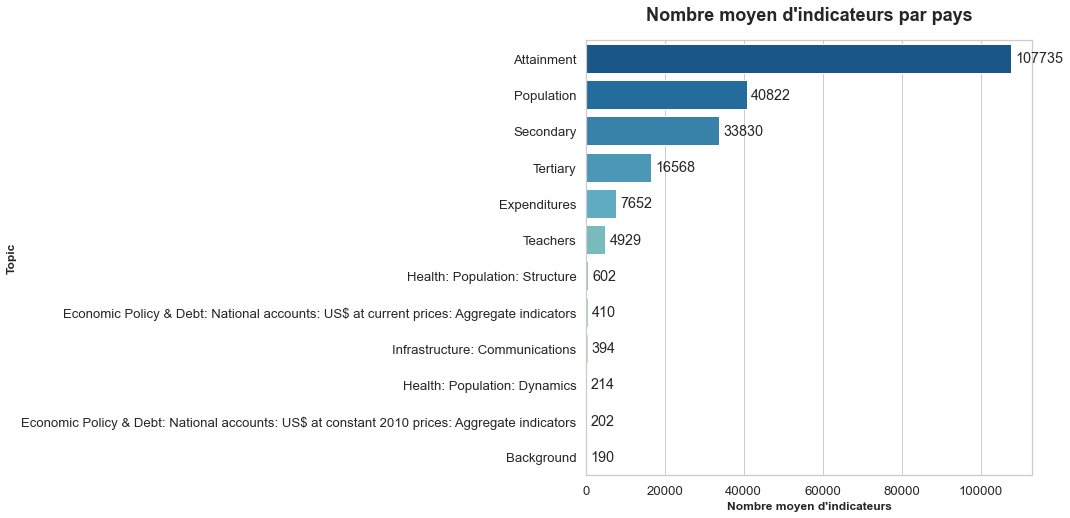

In [58]:
plt.figure(figsize=(8,8))
ax = sns.barplot(data=data_by_topic, x="Country Code", y="Topic", palette="GnBu_r")
ax.set_title("Nombre moyen d'indicateurs par pays")
ax.set(xlabel="Nombre moyen d'indicateurs")

for container in ax.containers:
    ax.bar_label(container, padding = 4)

plt.show()

> Les différentes catégories présentent un nombre d'indicateurs bien différents. "Attainment" est la catégorie la plus détaillée.

### Population

Cette catégorie donne des informations sur les caractéristiques de la population de chacun des pays.

In [59]:
# population with gender sub_indicators
df_pop_g = df_stats_p[df_stats_p['Topic']=='Population']

# population without gender sub_indicators
df_pop = drop_gender(df_pop_g)

df_pop['Indicator Code'].unique()

array(['UIS.SAP.CE', 'SP.SEC.LTOT.IN', 'UIS.SAP.4', 'SP.PRE.TOTL.IN',
       'SP.SEC.TOTL.IN', 'SP.TER.TOTL.IN', 'SP.SEC.UTOT.IN',
       'UIS.SAP.1.G1', 'UIS.SAP.23.GPV.G1', 'SP.POP.1014.TO.UN',
       'SP.POP.1015.TO.UN', 'SP.POP.1016.TO.UN', 'SP.POP.1017.TO.UN',
       'SP.POP.1018.TO.UN', 'SP.POP.1115.TO.UN', 'SP.POP.1116.TO.UN',
       'SP.POP.1117.TO.UN', 'SP.POP.1118.TO.UN', 'SP.POP.1215.TO.UN',
       'SP.POP.1216.TO.UN', 'SP.POP.1217.TO.UN', 'SP.POP.1218.TO.UN',
       'SP.POP.1316.TO.UN', 'SP.POP.1317.TO.UN', 'SP.POP.1318.TO.UN',
       'SP.POP.1319.TO.UN', 'SP.POP.1418.TO.UN', 'SP.POP.1419.TO.UN',
       'SP.POP.1524.TO.UN', 'SP.POP.0305.TO.UN', 'SP.POP.0406.TO.UN',
       'SP.POP.0510.TO.UN', 'SP.POP.0511.TO.UN', 'SP.POP.0509.TO.UN',
       'SP.POP.0610.TO.UN', 'SP.POP.0611.TO.UN', 'SP.POP.0612.TO.UN',
       'SP.POP.0609.TO.UN', 'SP.POP.0710.TO.UN', 'SP.POP.0711.TO.UN',
       'SP.POP.0712.TO.UN', 'SP.POP.0713.TO.UN', 'SP.POP.0709.TO.UN'],
      dtype=object)

- Exemple d'indicateurs :

In [60]:
df_temp_age = df_stats_p[df_stats_p['Indicator Code'].str.contains('4549')]
df_temp_age = df_temp_age['Long definition'].unique()
df_temp_age[0]

'Average years of primary schooling, 45-49, female is the average years of primary education completed among females age 45-49.'

> On observe des indicateurs déclinés par tranche d'âge. Nous allons cibler les indicateurs d'âge correspondant au niveau lycée et université.

- Filtre sur les données :

In [61]:
list_pop_to_keep = ['UIS.SAP.CE', 'SP.SEC.LTOT.IN', 'UIS.SAP.4', 'SP.PRE.TOTL.IN',
       'SP.SEC.TOTL.IN', 'SP.TER.TOTL.IN', 'SP.SEC.UTOT.IN',
       'UIS.SAP.1.G1', 'UIS.SAP.23.GPV.G1', 'SP.POP.1524.TO.UN']

list_pop_age_g = list(df_pop_g['Indicator Code'].unique())
list_pop_to_drop = list(set(list_pop_age_g)-set(list_pop_to_keep))

df_stats_p = df_stats_p[~df_stats_p['Indicator Code'].isin(list_pop_to_drop)]

values_rate(df_pop[df_pop['Indicator Code'].isin(list_pop_to_keep)])

,Indicator Code,Indicator Name,Long definition,Topic,Nb de pays,Ratio country,Nb Valeurs,nb_years,Values ratio by country
0,SP.PRE.TOTL.IN,"Population of the official age for pre-primary education, both sexes (number)",Population of the age-group theoretically corresponding to pre-primary education as indicated by theoretical entrance age and duration.,Population,196,0.92,3072,16,0.98
1,SP.TER.TOTL.IN,"Population of the official age for tertiary education, both sexes (number)",Population of the age-group theoretically corresponding to tertiary education as indicated by theoretical entrance age and duration.,Population,196,0.92,2940,16,0.94
2,SP.SEC.LTOT.IN,"Population of the official age for lower secondary education, both sexes (number)",Population of the age-group theoretically corresponding to lower secondary education as indicated by theoretical entrance age and duration.,Population,195,0.91,3080,16,0.99
3,SP.SEC.TOTL.IN,"Population of the official age for secondary education, both sexes (number)",Population of the age-group theoretically corresponding to secondary education as indicated by theoretical entrance age and duration.,Population,195,0.91,3077,16,0.99
4,SP.SEC.UTOT.IN,"Population of the official age for upper secondary education, both sexes (number)",Population of the age-group theoretically corresponding to upper secondary education as indicated by theoretical entrance age and duration.,Population,195,0.91,3082,16,0.99
5,UIS.SAP.1.G1,"Population of the official entrance age to primary education, both sexes (number)","Population of the age-group theoretically corresponding to the official entrance age to primary education. The official entrance age is the age at which students would enter a given programme or level of education assuming they start at the official entrance age for the lowest level of education, study full-time throughout and progressed through the system without repeating or skipping a grade. The theoretical entrance age to a given programme or level is typically, but not always, the most common entrance age.",Population,195,0.91,3001,16,0.96
6,UIS.SAP.23.GPV.G1,"Population of the official entrance age to secondary general education, both sexes (number)",Population of the age-group theoretically corresponding to secondary general education as indicated by theoretical entrance age and duration.,Population,195,0.91,3049,16,0.98
7,SP.POP.1524.TO.UN,"Population, ages 15-24, total","Population, ages 15-24, total is the total population age 15-24.",Population,192,0.90,2963,16,0.96
8,UIS.SAP.CE,"Population of compulsory school age, both sexes (number)",Population of children within the age span that children are legally obliged to attend school.,Population,172,0.80,2330,15,0.90
9,UIS.SAP.4,"Population of the official age for post-secondary non-tertiary education, both sexes (number)",Population of the age-group theoretically corresponding to post-secondary non-tertiary education as indicated by theoretical entrance age and duration.,Population,164,0.77,2106,16,0.80


### Secondary

Cette catégorie contient des indicateurs sur les étudiants sur l'équivalent du "secondaire" anglais. On va cibler ici les étudiants de lycée, ce qui correspond au **"Secondary upper"**.

In [62]:
# secondary with gender sub_indicators
df_temp_sec_g = df_stats_p[df_stats_p['Topic']=='Secondary']

# secondary without gender sub_indicators
df_temp_sec = drop_gender(df_temp_sec_g)

# population with durantion and lower secondary sub_indicators
df_temp_sec = df_temp_sec[~df_temp_sec['Indicator Name'].str.contains('lower|duration', regex=True)]                         
                          
values_rate(df_temp_sec)

,Indicator Code,Indicator Name,Long definition,Topic,Nb de pays,Ratio country,Nb Valeurs,nb_years,Values ratio by country
0,SE.SEC.ENRL.GC,"Enrolment in secondary general, both sexes (number)",Total number of students enrolled in general programmes at public and private secondary education institutions regardless of age.,Secondary,200,0.93,2543,16,0.79
1,UIS.E.3.GPV,"Enrolment in upper secondary general, both sexes (number)",Total number of students enrolled in general programmes at public and private upper secondary education institutions regardless of age.,Secondary,200,0.93,2383,16,0.74
2,UIS.E.3,"Enrolment in upper secondary education, both sexes (number)",Total number of students enrolled in public and private upper secondary education institutions regardless of age.,Secondary,198,0.93,2227,16,0.70
3,SE.SEC.ENRL,"Enrolment in secondary education, both sexes (number)",Total number of students enrolled at public and private secondary education institutions regardless of age.,Secondary,197,0.92,2357,16,0.75
4,UIS.GTVP.3.GPV,"Percentage of students in upper secondary education enrolled in general programmes, both sexes (%)","Total number of students enrolled in general programmes at the upper secondary education level, expressed as a percentage of the total number of students enrolled in all programmes (vocational and general) at the upper secondary level. General education is designed to develop learners’ general knowledge, skills and competencies and literacy and numeracy skills, often to prepare students for more advanced educational programmes at the same or higher ISCED levels and to lay the foundation for lifelong learning. General educational programmes are typically school- or college-based. General education includes educational programmes that are designed to prepare students for entry into vocational education, but that do not prepare for employment in a particular occupation or trade or class of occupations or trades, nor lead directly to a labour market relevant qualification.",Secondary,196,0.92,2139,16,0.68
5,UIS.GTVP.23.GPV,"Percentage of students in secondary education enrolled in general programmes, both sexes (%)","Total number of students enrolled in general programmes at the secondary education level, expressed as a percentage of the total number of students enrolled in all programmes (vocational and general) at the secondary level. General education is designed to develop learners’ general knowledge, skills and competencies and literacy and numeracy skills, often to prepare students for more advanced educational programmes at the same or higher ISCED levels and to lay the foundation for lifelong learning. General educational programmes are typically school- or college-based. General education includes educational programmes that are designed to prepare students for entry into vocational education, but that do not prepare for employment in a particular occupation or trade or class of occupations or trades, nor lead directly to a labour market relevant qualification.",Secondary,196,0.92,2149,16,0.69
6,UIS.E.3.PU,"Enrolment in upper secondary education, public institutions, both sexes (number)","Total number of individuals enrolled in public upper secondary education institutions regardless of age. Public education Institutions are controlled and managed directly by a public education authority or agency of the country where it is located or by a government agency directly or by a governing body (council, committee etc.), most of whose members are either appointed by a public authority of the country where it is located or elected by public franchise.",Secondary,194,0.91,1871,16,0.60
7,UIS.SLE.23,"School life expectancy, secondary, both sexes (years)","Number of years a person of school entrance age can expect to spend within the specified level of education. For a child of a certain age a, the school life expectancy is calculated as the sum of the age specific enrolment rates for the levels of education sp

Filtre des données :

In [63]:
list_temp_secondary_g = list(df_temp_sec_g['Indicator Code'].unique())
list_temp_secondary = list(df_temp_sec['Indicator Code'].unique())

list_temp_secondary_drop = list(set(list_temp_secondary_g)-set(list_temp_secondary))

df_stats_p = df_stats_p[~df_stats_p['Indicator Code'].isin(list_temp_secondary_drop)]

### Tertiary

Cette catégorie contient des indicateurs sur les étudiants de l'équivalent du "tertiary" anglais (post-bac).

In [64]:
# tertiary with gender sub_indicators
df_temp_ter_g = df_stats_p[df_stats_p['Topic']=='Tertiary']

# tertiary without gender sub_indicators
df_temp_ter = drop_gender(df_temp_ter_g)

values_rate(df_temp_ter)

,Indicator Code,Indicator Name,Long definition,Topic,Nb de pays,Ratio country,Nb Valeurs,nb_years,Values ratio by country
0,SE.TER.ENRL,"Enrolment in tertiary education, all programmes, both sexes (number)",The total number of students enrolled at public and private tertiary education institutions.,Tertiary,193,0.90,2088,16,0.68
1,UIS.GOER.56,"Gross outbound enrolment ratio, all regions, both sexes (%)",Total number of mobile tertiary students coming from a country/region as a percentage of the population of tertiary student age in their home country.,Tertiary,189,0.88,2483,14,0.94
2,UIS.SLE.56,"School life expectancy, tertiary, both sexes (years)","Number of years a person of school entrance age can expect to spend within the specified level of education. For a child of a certain age a, the school life expectancy is calculated as the sum of the age specific enrolment rates for the levels of education specified. The part of the enrolment that is not distributed by age is divided by the school-age population for the level of education they are enrolled in, and multiplied by the duration of that level of education. The result is then added to the sum of the age-specific enrolment rates. A relatively high SLE indicates greater probability for children to spend more years in education and higher overall retention within the education system. It must be noted that the expected number of years does not necessarily coincide with the expected number of grades of education completed, because of repetition. Since school life expectancy is an average based on participation in different levels of education, the expected number of years of schooling may be pulled down by the magnitude of children who never go to school. Those children who are in school may benefit from many more years of education than the average.",Tertiary,185,0.86,1902,16,0.64
3,UIS.TE_100000.56,"Enrolment in tertiary education per 100,000 inhabitants, both sexes","Number of students enrolled in tertiary education in a given academic year per 100,000 inhabitants. It is calculated by dividing the total number of students enrolled in tertiary education in a given academic year by the country’s population and multiplying the result by 100,000. This indicator shows the general level of participation in tertiary education by indicating the proportion (or density) of students within a country’s population.",Tertiary,185,0.86,1905,16,0.64
4,SE.TER.ENRR,"Gross enrolment ratio, tertiary, both sexes (%)","Total enrollment in tertiary education (ISCED 5 to 8), regardless of age, expressed as a percentage of the total population of the five-year age group following on from secondary school leaving.",Tertiary,184,0.86,2011,16,0.68
5,SE.TOT.ENRR,"Gross enrolment ratio, primary to tertiary, both sexes (%)","Total enrollment in primary, secondary and tertiary education, regardless of age, expressed as a percentage of the total population of primary school age, secondary school age, and the five-year age group following on from secondary school leaving. GER can exceed 100% due to the inclusion of over-aged and under-aged students because of early or late school entrance and grade repetition.",Tertiary,183,0.86,1751,16,0.60
6,SE.TER.GRAD,"Graduates from tertiary education, both sexes (number)",Total number of students successfully completing tertiary education programmes (ISCED 5 to 8) in public and private tertiary education institutions during the reference academic year.,Tertiary,170,0.79,1430,16,0.53
7,SE.TER.PRIV.ZS,Percentage of enrolment in tertiary education in private institutions (%),"Total number of students in tertiary education enrolled in institutions that are not operated by a public authority but controlled and managed, whether for profit or not, by a private body (e.g., non-governmental organisation, religious body, special interest group, foundation or business enterprise), expressed as a percentage of total number of students enrolled in tertiary education.",Tertiary,1

Filtre des données :

In [65]:
list_temp_tertiary = list(df_temp_ter_g['Indicator Code'].unique())
list_temp_tertiary.remove('SE.TER.ENRL')
list_temp_tertiary.remove('SE.TER.ENRR')

df_stats_p = df_stats_p[~df_stats_p['Indicator Code'].isin(list_temp_tertiary)]

### Attainment

Niveau d'instruction illustre la distribution du niveau d'instruction et du capital humain dans plus de 100 pays de 1970 à 2010.

<center><img src="img/Attainment_topic.png"/></center>

In [66]:
df_att_g = df_stats_p[df_stats_p['Topic']=='Attainment']

**- indicateurs Barro-Lee :**

In [67]:
df_att_bar_g = df_att_g[df_att_g['Indicator Code'].str.startswith('BAR')]
df_att_bar = drop_gender(df_att_bar_g)

Exemple d'indicateur avec âge :

In [68]:
df_temp_bar = df_att_bar[df_att_bar['Indicator Code'].str.contains('4549')]
df_temp_bar = df_temp_bar['Long definition'].unique()
df_temp_bar[0]

'Average years of secondary schooling, 45-49, total is the average years of secondary education completed among people age 45-49.'

Sélection des indicateurs correspondant à notre cible :

In [69]:
age_range_to_drop = '15UP|25UP|2529|3034|3539|4044|4549|5054|5559|6064|6569|7074|75UP'

df_att_bar = df_att_bar[~df_att_bar['Indicator Code'].str.contains(age_range_to_drop, regex=True)]

values_rate(df_att_bar)

,Indicator Code,Indicator Name,Long definition,Topic,Nb de pays,Ratio country,Nb Valeurs,nb_years,Values ratio by country
0,BAR.NOED.1519.ZS,Barro-Lee: Percentage of population age 15-19 with no education,Percentage of population age 15-19 with no education,Attainment,144,0.67,432,3,1.00
1,BAR.NOED.2024.ZS,Barro-Lee: Percentage of population age 20-24 with no education,Percentage of population age 20-24 with no education,Attainment,144,0.67,432,3,1.00
2,BAR.POP.1519,"Barro-Lee: Population in thousands, age 15-19, total","Population in thousands, age 15-19, total is the total population of 15-19 year olds in thousands estimated by Barro-Lee.",Attainment,144,0.67,432,3,1.00
3,BAR.POP.2024,"Barro-Lee: Population in thousands, age 20-24, total","Population in thousands, age 20-24, total is the total population of 20-24 year olds in thousands estimated by Barro-Lee.",Attainment,144,0.67,432,3,1.00
4,BAR.SCHL.1519,"Barro-Lee: Average years of total schooling, age 15-19, total","Average years of total schooling, 15-19, total is the average years of education completed among people age 15-19.",Attainment,144,0.67,432,3,1.00
5,BAR.SCHL.2024,"Barro-Lee: Average years of total schooling, age 20-24, total","Average years of total schooling, 20-24, total is the average years of education completed among people age 20-24.",Attainment,144,0.67,432,3,1.00
6,BAR.SEC.SCHL.1519,"Barro-Lee: Average years of secondary schooling, age 15-19, total","Average years of secondary schooling, 15-19, total is the average years of secondary education completed among people age 15-19.",Attainment,144,0.67,432,3,1.00
7,BAR.SEC.SCHL.2024,"Barro-Lee: Average years of secondary schooling, age 20-24, total","Average years of secondary schooling, 20-24, total is the average years of secondary education completed among people age 20-24.",Attainment,144,0.67,432,3,1.00
8,BAR.TER.SCHL.1519,"Barro-Lee: Average years of tertiary schooling, age 15-19, total","Average years of tertiary schooling, 15-19, total is the average years of tertiary education completed among people age 15-19.",Attainment,144,0.67,432,3,1.00
9,BAR.TER.SCHL.2024,"Barro-Lee: Average years of tertiary schooling, age 20-24, total","Average years of tertiary schooling, 20-24, total is the average years of tertiary education completed among people age 20-24.",Attainment,144,0.67,432,3,1.00


Filtre sur les données :

In [70]:
# Suppression des indicateurs par genre
list_bar_g = list(df_att_bar_g['Indicator Code'].unique())
lits_bar_filter = list(df_att_bar['Indicator Code'].unique())

list_bar_drop = list(set(list_bar_g)-set(lits_bar_filter))

df_stats_p = df_stats_p[~df_stats_p['Indicator Code'].isin(list_bar_drop)]

**- indicateurs prédis :**

Exemple d'indicateur :

In [71]:
df_att_prj = df_att_g[df_att_g['Indicator Code'].str.startswith('PRJ')]
df_att_prj_ex = df_att_prj['Long definition'].unique()
df_att_prj_ex[0]

"Mean number of years spent in school by age group and gender. Projections are based on collected census and survey data for the base year (around 2010) and the Medium Shared Socioeconomic Pathways (SSP2) projection model. The SSP2 is a middle-of-the-road scenario that combines medium fertility with medium mortality, medium migration, and the Global Education Trend (GET) education scenario. For more information and other projection models, consult the Wittgenstein Centre for Demography and Global Human Capital's website: http://www.oeaw.ac.at/vid/dataexplorer/"

Filtre sur les données :

In [72]:
# Suppression des indicateurs par genre
df_att = drop_gender(df_att_g)
list_att_indicators_g = list(df_att_g['Indicator Code'].unique())
lits_att_indicotors_filter = list(df_att['Indicator Code'].unique())

list_att_drop = list(set(list_att_indicators_g)-set(lits_att_indicotors_filter))

df_stats_p = df_stats_p[~df_stats_p['Indicator Code'].isin(list_att_drop)]

# Suppression des indicateurs PRJ
df_stats_p = df_stats_p[~df_stats_p['Indicator Code'].str.startswith('PRJ')]

### Infrastructure: Communications

Cette catégorie contient des informations sur l'accès à internet et aux équipements d'ordinateurs des pays.

In [73]:
df_temp_com = df_stats_p[df_stats_p['Topic']=='Infrastructure: Communications']
values_rate(df_temp_com)

,Indicator Code,Indicator Name,Long definition,Topic,Nb de pays,Ratio country,Nb Valeurs,nb_years,Values ratio by country
0,IT.NET.USER.P2,Internet users (per 100 people),"Internet users are individuals who have used the Internet (from any location) in the last 3 months. The Internet can be used via a computer, mobile phone, personal digital assistant, games machine, digital TV etc.",Infrastructure: Communications,204,0.95,3183,16,0.98
1,IT.CMP.PCMP.P2,Personal computers (per 100 people),Personal computers are self-contained computers designed to be used by a single individual.,Infrastructure: Communications,190,0.89,1231,10,0.65


> Nous gardons **IT.NET.USER.P2** qui est un indicateur sur l'utilisation d'internet car nos cours sont en lignes.

Filtre sur les données :

In [74]:
df_stats_p = df_stats_p[~df_stats_p['Indicator Code'].str.contains("IT.CMP.PCMP.P2")]

### Learning Outcomes

Niveaux d'apprentissage des élèves en lecture, en mathématiques et en sciences dans plus de 100 pays sur la base des données de quatre évaluations internationales de l'apprentissage (PISA, TIMSS, PIRLS et PIAAC) et de trois évaluations régionales de l'apprentissage (LLECE, PASEC et SACMEQ).

In [75]:
df_temp_learn = df_stats_p[df_stats_p['Topic']=='Learning Outcomes']

<center><img src="img/Learning_Outcomes_topic.png"/></center>

<center><img src="img/UK-US_grade.jpg" width="300"/></center>

> Etant donnée que notre cible concerne le collège et le lycée, nous gardons dans cette catégorie les indicateurs **PIAAC**.

Filtre sur les données :

In [76]:
df_temp_learn_PIAAC = drop_gender(df_temp_learn)
df_temp_learn_PIAAC = df_temp_learn[df_temp_learn['Indicator Code'].str.contains('PIAAC')]

list_temp_learn_PIAAC = df_temp_learn_PIAAC['Indicator Code'].unique().tolist()
list_temp_learn = df_temp_learn['Indicator Code'].unique().tolist()

list_temp_learn_drop = list(set(list_temp_learn)-set(list_temp_learn_PIAAC))

df_stats_p = df_stats_p[~df_stats_p['Indicator Code'].isin(list_temp_learn_drop)]

### Economic Policy & Debt

Dans cette catégorie nous retrouvons des indicateurs économiques des pays.

In [77]:
df_temp_eco = df_stats_p[df_stats_p['Topic'] \
                         =='Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators']
values_rate(df_temp_eco)

,Indicator Code,Indicator Name,Long definition,Topic,Nb de pays,Ratio country,Nb Valeurs,nb_years,Values ratio by country
0,NY.GDP.MKTP.CD,GDP (current US$),"GDP at purchaser's prices is the sum of gross value added by all resident producers in the economy plus any product taxes and minus any subsidies not included in the value of the products. It is calculated without making deductions for depreciation of fabricated assets or for depletion and degradation of natural resources. Data are in current U.S. dollars. Dollar figures for GDP are converted from domestic currencies using single year official exchange rates. For a few countries where the official exchange rate does not reflect the rate effectively applied to actual foreign exchange transactions, an alternative conversion factor is used.",Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators,209,0.98,3224,16,0.96
1,NY.GNP.MKTP.CD,GNI (current US$),GNI (formerly GNP) is the sum of value added by all resident producers plus any product taxes (less subsidies) not included in the valuation of output plus net receipts of primary income (compensation of employees and property income) from abroad. Data are in current U.S. dollars.,Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators,201,0.94,3075,16,0.96


In [78]:
df_temp_eco = df_stats_p[df_stats_p['Topic'] \
                         =='Economic Policy & Debt: National accounts: US$ at constant 2010 prices: Aggregate indicators']
values_rate(df_temp_eco)

,Indicator Code,Indicator Name,Long definition,Topic,Nb de pays,Ratio country,Nb Valeurs,nb_years,Values ratio by country
0,NY.GDP.MKTP.KD,GDP (constant 2010 US$),"GDP at purchaser's prices is the sum of gross value added by all resident producers in the economy plus any product taxes and minus any subsidies not included in the value of the products. It is calculated without making deductions for depreciation of fabricated assets or for depletion and degradation of natural resources. Data are in constant 2010 U.S. dollars. Dollar figures for GDP are converted from domestic currencies using 2010 official exchange rates. For a few countries where the official exchange rate does not reflect the rate effectively applied to actual foreign exchange transactions, an alternative conversion factor is used.",Economic Policy & Debt: National accounts: US$ at constant 2010 prices: Aggregate indicators,202,0.94,3148,16,0.97


In [79]:
df_temp_eco = df_stats_p[df_stats_p['Topic'] \
                         =='Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita']
values_rate(df_temp_eco)

No data


Filtre sur les données :

In [80]:
list_to_drop = "NY.GNP.MKTP.CD|NY.GDP.MKTP.KD"
df_stats_p = df_stats_p[~df_stats_p['Indicator Code'].str.contains(list_to_drop)]

### Expenditures & Teachers

**- Expenditures :**

Cette catégorie regroupe les dépenses des pays dans leurs systèmes d'éducation.

In [81]:
df_exp_g = df_stats_p[df_stats_p['Topic']=='Expenditures']
df_exp = drop_gender(df_exp_g)
values_rate(df_exp)

,Indicator Code,Indicator Name,Long definition,Topic,Nb de pays,Ratio country,Nb Valeurs,nb_years,Values ratio by country
0,SE.XPD.TOTL.GD.ZS,Government expenditure on education as % of GDP (%),"Total general (local, regional and central) government expenditure on education (current, capital, and transfers), expressed as a percentage of GDP. It includes expenditure funded by transfers from international sources to government. Divide total government expenditure for a given level of education (ex. primary, secondary, or all levels combined) by the GDP, and multiply by 100. A higher percentage of GDP spent on education shows a higher government priority for education, but also a higher capacity of the government to raise revenues for public spending, in relation to the size of the country's economy. When interpreting this indicator however, one should keep in mind in some countries, the private sector and/or households may fund a higher proportion of total funding for education, thus making government expenditure appear lower than in other countries. For more information, consult the UNESCO Institute of Statistics website: http://www.uis.unesco.org/Education/",Expenditures,182,0.85,1794,16,0.62
1,SE.XPD.TOTL.GB.ZS,Expenditure on education as % of total government expenditure (%),"Total general (local, regional and central) government expenditure on education (current, capital, and transfers), expressed as a percentage of total general government expenditure on all sectors (including health, education, social services, etc.). It includes expenditure funded by transfers from international sources to government. Public education expenditure includes spending by local/municipal, regional and national governments (excluding household contributions) on educational institutions (both public and private), education administration, and subsidies for private entities (students/households and other privates entities). In some instances data on total public expenditure on education refers only to the ministry of education and can exclude other ministries that spend a part of their budget on educational activities. The indicator is calculated by dividing total public expenditure on education incurred by all government agencies/departments by the total government expenditure and multiplying by 100. For more information, consult the UNESCO Institute of Statistics website: http://www.uis.unesco.org/Education/",Expenditures,175,0.82,1732,16,0.62
2,SE.XPD.TERT.ZS,Expenditure on tertiary as % of government expenditure on education (%),"Expenditure on education by level of education, expressed as a percentage of total general government expenditure on education. Divide government expenditure on a given level of education (ex. primary, secondary) by total government expenditure on education (all levels combined), and multiply by 100. A high percentage of government expenditure on education spent on a given level denotes a high priority given to that level compared to others. When interpreting this indicator, one should take into account enrolment at that level, and the relative costs per student between different levels of education. For more information, consult the UNESCO Institute of Statistics website: http://www.uis.unesco.org/Education/",Expenditures,171,0.80,1415,16,0.52
3,SE.XPD.SECO.ZS,Expenditure on secondary as % of government expenditure on education (%),"Expenditure on education by level of education, expressed as a percentage of total general government expenditure on education. Divide government expenditure on a given level of education (ex. primary, secondary) by total government expenditure on education (all levels combined), and multiply by 100. A high percentage of government expenditure on education spent on a given level denotes a high priority given to that level compared to others. When interpreting this indicator, one should take into account enrolment at that level, and the relative costs per student between different levels

Filtre sur les données :

In [82]:
# Suppression des indicateurs par genre
list_exp_g = list(df_exp_g['Indicator Code'].unique())
list_exp = list(df_exp['Indicator Code'].unique())

list_exp_drop = list(set(list_exp_g)-set(list_exp))

df_stats_p = df_stats_p[~df_stats_p['Indicator Code'].isin(list_exp_drop)]

**- Teachers :**

Cette catégories contient des indicateurs sur les enseignants.

In [83]:
df_teach_g = df_stats_p[df_stats_p['Topic']=='Teachers']
df_teach = drop_gender(df_teach_g)
df_teach = df_teach[~df_teach['Indicator Name'].str.contains('primary|lower', regex=True)]
values_rate(df_teach)

,Indicator Code,Indicator Name,Long definition,Topic,Nb de pays,Ratio country,Nb Valeurs,nb_years,Values ratio by country
0,SE.SEC.ENRL.TC.ZS,Pupil-teacher ratio in secondary education (headcount basis),"Average number of pupils per teacher at a given level of education, based on headcounts of both pupils and teachers. Divide the total number of pupils enrolled at the specified level of education by the number of teachers at the same level. In computing and interpreting this indicator, one should take into account the existence of part-time teaching, school-shifts, multi-grade classes and other practices that may affect the precision and meaningfulness of pupil-teacher ratios. When feasible, the number of part-time teachers is converted to ‘full-time equivalent’ teachers; a double-shift teacher is counted twice, etc. Teachers are defined as persons whose professional activity involves the transmitting of knowledge, attitudes and skills that are stipulated in a formal curriculum programme to students enrolled in a formal educational institution.",Teachers,180,0.84,1666,16,0.58
1,SE.SEC.TCHR,"Teachers in secondary education, both sexes (number)","Total number of teachers in public and private secondary education institutions (ISCED 2 and 3). Teachers are persons employed full time or part time in an official capacity to guide and direct the learning experience of pupils and students, irrespective of their qualifications or the delivery mechanism, i.e. face-to-face and/or at a distance. This definition excludes educational personnel who have no active teaching duties (e.g. headmasters, headmistresses or principals who do not teach) and persons who work occasionally or in a voluntary capacity in educational institutions.",Teachers,180,0.84,1700,16,0.59
2,SE.TER.TCHR,"Teachers in tertiary education programmes, both sexes (number)","Total number of teachers in public and private tertiary education institutions (ISCED 5-8). Teachers are persons employed full time or part time in an official capacity to guide and direct the learning experience of pupils and students, irrespective of their qualifications or the delivery mechanism, i.e. face-to-face and/or at a distance. This definition excludes educational personnel who have no active teaching duties (e.g. headmasters, headmistresses or principals who do not teach) and persons who work occasionally or in a voluntary capacity in educational institutions.",Teachers,179,0.84,1576,16,0.55
3,UIS.PTRHC.56,Pupil-teacher ratio in tertiary education (headcount basis),"Average number of pupils per teacher at a given level of education, based on headcounts of both pupils and teachers. Divide the total number of pupils enrolled at the specified level of education by the number of teachers at the same level. In computing and interpreting this indicator, one should take into account the existence of part-time teaching, school-shifts, multi-grade classes and other practices that may affect the precision and meaningfulness of pupil-teacher ratios. When feasible, the number of part-time teachers is converted to ‘full-time equivalent’ teachers; a double-shift teacher is counted twice, etc. Teachers are defined as persons whose professional activity involves the transmitting of knowledge, attitudes and skills that are stipulated in a formal curriculum programme to students enrolled in a formal educational institution.",Teachers,177,0.83,1536,16,0.54
4,UIS.T.23.GPV,"Teachers in secondary general education, both sexes (number)","Total number of teachers in general programmes in public and private secondary education institutions (ISCED 2 and 3). Teachers are persons employed full time or part time in an official capacity to guide and direct the learning experience of pupils and students, irrespective of their qualifications or the delivery mechanism, i.e. face-to-face and/or at a distance. This definition excludes educational personnel who have no active teaching duties (e.g. headmasters, headmistresses or

Filtre sur les données :

In [84]:
# Suppression des indicateurs par genre
list_teach_g = list(df_teach_g['Indicator Code'].unique())
list_teach = list(df_teach['Indicator Code'].unique())

list_teach_drop = list(set(list_teach_g)-set(list_teach_g))

df_stats_p = df_stats_p[~df_stats_p['Indicator Code'].isin(list_teach_drop)]

## Sélection des indicateurs

### Taux de valeurs des indicateurs

**Classement des indicateurs préseltionnés par taux de remplissage :**

In [85]:
df_coutry_ind = values_rate(df_stats_p)
df_coutry_ind.drop(columns = "Long definition")

,Indicator Code,Indicator Name,Topic,Nb de pays,Ratio country,Nb Valeurs,nb_years,Values ratio by country
0,SP.POP.TOTL,"Population, total",Health: Population: Structure,214,1.00,3412,16,1.00
1,SP.POP.GROW,Population growth (annual %),Health: Population: Dynamics,214,1.00,3411,16,1.00
2,NY.GDP.MKTP.CD,GDP (current US$),Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators,209,0.98,3224,16,0.96
3,IT.NET.USER.P2,Internet users (per 100 people),Infrastructure: Communications,204,0.95,3183,16,0.98
4,UIS.E.3.GPV,"Enrolment in upper secondary general, both sexes (number)",Secondary,200,0.93,2383,16,0.74
5,SE.SEC.ENRL.GC,"Enrolment in secondary general, both sexes (number)",Secondary,200,0.93,2543,16,0.79
6,UIS.E.3,"Enrolment in upper secondary education, both sexes (number)",Secondary,198,0.93,2227,16,0.70
7,SE.SEC.ENRL,"Enrolment in secondary education, both sexes (number)",Secondary,197,0.92,2357,16,0.75
8,SP.TER.TOTL.IN,"Population of the official age for tertiary education, both sexes (number)",Population,196,0.92,2940,16,0.94
9,SP.PRE.TOTL.IN,"Population of the official age for pre-primary education, both sexes (number)",Population,196,0.92,3072,16,0.98


> Nous avons 89 indicateurs pré-sélectionnés.

### Sélection

On sélectionne les indicateurs les plus pertinents dans ces indicateurs les plus renseignés :

In [86]:
list_indicators = [
    'SP.POP.GROW',
    'SP.POP.TOTL',
    'NY.GDP.MKTP.CD',
    'IT.NET.USER.P2',
    'UIS.E.3',
    'SE.TER.ENRL',
    'SE.SEC.ENRR.UP',
    'SE.TER.ENRR',
    'SP.POP.1524.TO.UN',
    'UIS.PTRHC.56',
    'SE.SEC.ENRL.TC.ZS'
]

df_stats_p_selected = df_stats_p[df_stats_p['Indicator Code'].isin(list_indicators)]
df_coutry_ind_selected = values_rate(df_stats_p_selected)
df_coutry_ind_selected.drop(columns = "Long definition")

,Indicator Code,Indicator Name,Topic,Nb de pays,Ratio country,Nb Valeurs,nb_years,Values ratio by country
0,SP.POP.GROW,Population growth (annual %),Health: Population: Dynamics,214,1.00,3411,16,1.00
1,SP.POP.TOTL,"Population, total",Health: Population: Structure,214,1.00,3412,16,1.00
2,NY.GDP.MKTP.CD,GDP (current US$),Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators,209,0.98,3224,16,0.96
3,IT.NET.USER.P2,Internet users (per 100 people),Infrastructure: Communications,204,0.95,3183,16,0.98
4,UIS.E.3,"Enrolment in upper secondary education, both sexes (number)",Secondary,198,0.93,2227,16,0.70
5,SE.TER.ENRL,"Enrolment in tertiary education, all programmes, both sexes (number)",Tertiary,193,0.90,2088,16,0.68
6,SP.POP.1524.TO.UN,"Population, ages 15-24, total",Population,192,0.90,2963,16,0.96
7,SE.SEC.ENRR.UP,"Gross enrolment ratio, upper secondary, both sexes (%)",Secondary,190,0.89,2271,16,0.75
8,SE.TER.ENRR,"Gross enrolment ratio, tertiary, both sexes (%)",Tertiary,184,0.86,2011,16,0.68
9,SE.SEC.ENRL.TC.ZS,Pupil-teacher ratio in secondary education (headcount basis),Teachers,180,0.84,1666,16,0.58


**Nombre d'indicateur renseignés par années :**

In [87]:
df_stats_p_selected.groupby('Indicator Code').count().reset_index()

,Indicator Code,Country Code,Region,Income Group,Country Name,Indicator Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,Topic,Short definition,Long definition,Source,not_null_values
0,IT.NET.USER.P2,204,204,204,204,204,195,196,198,192,195,197,196,203,202,201,201,203,201,201,201,201,204,0,204,204,204
1,NY.GDP.MKTP.CD,209,209,209,209,209,199,199,203,203,204,204,205,204,203,202,203,203,199,200,197,196,209,0,209,209,209
2,SE.SEC.ENRL.TC.ZS,180,180,180,180,180,110,110,108,108,109,106,101,112,101,103,94,107,99,99,107,92,180,0,180,180,180
3,SE.SEC.ENRR.UP,190,190,190,190,190,140,143,144,141,151,152,144,148,144,144,144,149,144,136,133,114,190,0,190,190,190
4,SE.TER.ENRL,193,193,193,193,193,123,122,132,134,133,129,129,129,134,136,140,142,141,131,124,109,193,0,193,193,193
5,SE.TER.ENRR,184,184,184,184,184,119,121,130,130,130,125,125,123,126,132,133,138,136,125,119,99,184,0,184,184,184
6,SP.POP.1524.TO.UN,192,192,192,192,192,190,191,192,192,191,191,187,181,181,181,181,181,181,181,181,181,192,192,192,192,192
7,SP.POP.GROW,214,214,214,214,214,214,214,214,214,214,214,214,214,214,214,214,213,213,213,209,209,214,214,214,214,214
8,SP.POP.TOTL,214,214,214,214,214,214,214,214,214,214,214,214,214,214,214,214,214,213,213,209,209,214,0,214,214,214
9,UIS.E.3,198,198,198,198,198,147,147,149,146,157,157,150,154,151,151,149,154,151,140,117,7,198,0,198,198,198


> Les indicateurs sélectionnés sont renseignés pour l'ensemble des années. Nous pourront analyser l'évolution de certains d'entre eux dans le temps.

---

# Analyses des données

Préformatage :

In [88]:
numeric_cols = df_stats_p_selected.loc[:,'2000':'2015'].columns.tolist()

list_col = ['Country Name'] + numeric_cols

## Dernières valeurs disponibles

Pour sélectionner nos pays, nous allons récupérer les valeurs les plus récentes pour chacun de nos indicateurs.

In [89]:
df_data = df_stats_p_selected.copy()

**Récupération des dernières valeurs :**

In [90]:
df_stats_years_values = df_data.loc[:,'2000':'2015']
df_data['Last Avail Values'] = df_stats_years_values.fillna(method='ffill', axis=1).iloc[:, -1]

df_data = df_data.drop(columns = df_data.loc[:,"2000":"2015"])
df_data.head(1)

,Country Code,Region,Income Group,Country Name,Indicator Name,Indicator Code,Topic,Short definition,Long definition,Source,not_null_values,Last Avail Values
284862,ABW,Latin America & Caribbean,High income: nonOECD,Aruba,"Enrolment in tertiary education, all programmes, both sexes (number)",SE.TER.ENRL,Tertiary,NaN,The total number of students enrolled at public and private tertiary education institutions.,UNESCO Institute for Statistics,16,1166.00


**Données par pays :**

In [91]:
df_data_pivot = df_data.pivot(
    index='Country Name',
    columns='Indicator Code',
    values='Last Avail Values')

df_data_pivot.head(2)

Indicator Code,IT.NET.USER.P2,NY.GDP.MKTP.CD,SE.SEC.ENRL.TC.ZS,SE.SEC.ENRR.UP,SE.TER.ENRL,SE.TER.ENRR,SP.POP.1524.TO.UN,SP.POP.GROW,SP.POP.TOTL,UIS.E.3,UIS.PTRHC.56
Country Name,,,,,,,,,,,
Afghanistan,8.26,19215562179.01,37.72,42.61,262874.00,8.66,7252785.00,2.94,33736494.00,968769.00,23.89
Albania,63.25,11335264966.56,13.51,89.46,160527.00,58.11,556269.00,-0.29,2880703.00,151937.00,23.59


In [92]:
df_data_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 214 entries, Afghanistan to Zimbabwe
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   IT.NET.USER.P2     204 non-null    float64
 1   NY.GDP.MKTP.CD     209 non-null    float64
 2   SE.SEC.ENRL.TC.ZS  180 non-null    float64
 3   SE.SEC.ENRR.UP     190 non-null    float64
 4   SE.TER.ENRL        193 non-null    float64
 5   SE.TER.ENRR        184 non-null    float64
 6   SP.POP.1524.TO.UN  192 non-null    float64
 7   SP.POP.GROW        214 non-null    float64
 8   SP.POP.TOTL        214 non-null    float64
 9   UIS.E.3            198 non-null    float64
 10  UIS.PTRHC.56       177 non-null    float64
dtypes: float64(11)
memory usage: 20.1+ KB


Les données fournies par les indicateurs sélectionnés présentent des valeurs nulles.

## Choix des pays par score

Afin de discriminer nos pays, nous allons calculer un score pondéré sur les indicateurs. Pour cela, il est nécessaire de normaliser les valeurs des indicateurs dans le but de les mettre à la même échelle et donc avoir des valeurs comparables.

### Normalisation des données

In [93]:
df_data_scaled = df_data_pivot.copy()
df_data_scaled = (df_data_scaled - df_data_scaled.mean()) / (df_data_scaled.max() - df_data_scaled.min())
    
df_data_scaled.head()

Indicator Code,IT.NET.USER.P2,NY.GDP.MKTP.CD,SE.SEC.ENRL.TC.ZS,SE.SEC.ENRR.UP,SE.TER.ENRL,SE.TER.ENRR,SP.POP.1524.TO.UN,SP.POP.GROW,SP.POP.TOTL,UIS.E.3,UIS.PTRHC.56
Country Name,,,,,,,,,,,
Afghanistan,-0.41,-0.02,0.33,-0.17,-0.02,-0.25,0.00,0.19,-0.00,-0.01,0.04
Albania,0.15,-0.02,-0.06,0.08,-0.02,0.18,-0.02,-0.19,-0.02,-0.02,0.03
Algeria,-0.10,-0.01,NaN,-0.06,0.00,-0.00,0.00,0.07,0.00,0.00,0.04
American Samoa,NaN,-0.02,NaN,NaN,-0.03,NaN,NaN,-0.14,-0.02,NaN,NaN
Andorra,0.49,-0.02,-0.14,NaN,-0.03,NaN,-0.03,-0.34,-0.02,-0.02,-0.10


In [94]:
df_data_scaled.describe()

Indicator Code,IT.NET.USER.P2,NY.GDP.MKTP.CD,SE.SEC.ENRL.TC.ZS,SE.SEC.ENRR.UP,SE.TER.ENRL,SE.TER.ENRR,SP.POP.1524.TO.UN,SP.POP.GROW,SP.POP.TOTL,UIS.E.3,UIS.PTRHC.56
count,204.00,209.00,180.00,190.00,193.00,184.00,192.00,214.00,214.00,198.00,177.00
mean,0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.00
std,0.29,0.09,0.14,0.19,0.10,0.25,0.10,0.15,0.10,0.09,0.10
min,-0.49,-0.02,-0.19,-0.37,-0.03,-0.32,-0.03,-0.46,-0.02,-0.02,-0.11
25%,-0.27,-0.02,-0.10,-0.17,-0.02,-0.23,-0.02,-0.10,-0.02,-0.02,-0.05
50%,0.01,-0.02,-0.04,0.02,-0.02,-0.07,-0.02,-0.02,-0.02,-0.02,-0.02
75%,0.25,-0.01,0.06,0.12,-0.01,0.21,-0.01,0.11,-0.01,-0.01,0.03
max,0.51,0.98,0.81,0.63,0.97,0.68,0.97,0.54,0.98,0.98,0.89


> En regardant les moyennes des indicateurs, on observe que les données sont normalisées.

Les distributions des indicateurs nous permettent d'apprécier le traitement de normalisation.

<AxesSubplot:ylabel='Density'>

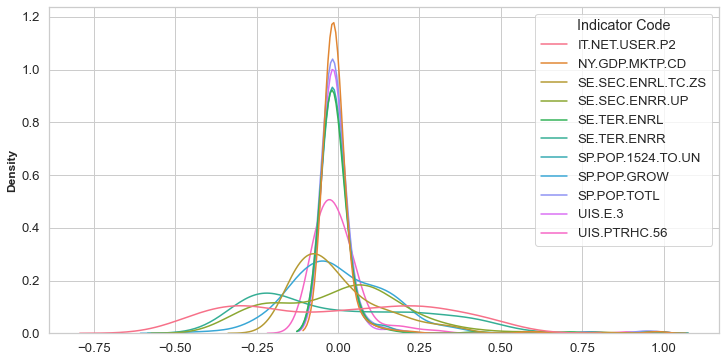

In [95]:
sns.kdeplot(data=df_data_scaled)

> La distribution des valeurs oscille autour de 0. Les données normalisées peuvent être utilisé pour la suite de notre analyse.

### Calcul de score

Pour notre calcul, chaque indicateur est associé à un coefficient donnant plus ou moins de point dans les caractéristiques de nos pays. Pour rappel, nous souhaitons choisir des pays qui ont une bonne connectivité à internet avec une population croissante.

In [96]:
df_data_scaled_sc = df_data_scaled.copy()

dict_coeff = {
    'SP.POP.GROW': 2,
    'SP.POP.TOTL': 1,
    'NY.GDP.MKTP.CD': 1,
    'IT.NET.USER.P2': 4,
    'UIS.E.3': 2,
    'SE.TER.ENRL': 2,
    'SE.SEC.ENRR.UP': 2,
    'SE.TER.ENRR': 2,
    'SP.POP.1524.TO.UN': 4,
    'UIS.PTRHC.56': -3,
    'SE.SEC.ENRL.TC.ZS': -3
}

for indicator, coeff in dict_coeff.items():
    df_data_scaled_sc[indicator] = df_data_scaled_sc[indicator] * coeff

df_data_scaled_sc['Score'] = df_data_scaled_sc.sum(axis=1)

### Top des pays

Le score calculé ci-dessus nous permet de classer nos pays selon nos critères.

In [97]:
df_data_scaled_sc_s = df_data_scaled_sc.sort_values(by='Score', ascending=False).head(10).reset_index()
df_data_scaled_sc_s

Indicator Code,Country Name,IT.NET.USER.P2,NY.GDP.MKTP.CD,SE.SEC.ENRL.TC.ZS,SE.SEC.ENRR.UP,SE.TER.ENRL,SE.TER.ENRR,SP.POP.1524.TO.UN,SP.POP.GROW,SP.POP.TOTL,UIS.E.3,UIS.PTRHC.56,Score
0,China,0.08,0.59,0.16,0.16,1.95,0.11,3.13,-0.20,0.98,1.54,-0.02,8.46
1,India,-0.91,0.10,-0.69,-0.12,1.43,-0.18,3.90,-0.04,0.93,1.95,-0.12,6.24
2,United States,1.06,0.98,0.11,0.19,0.85,0.86,0.64,-0.14,0.21,0.38,0.13,5.26
3,Denmark,1.95,-0.00,0.28,0.73,-0.04,0.80,-0.09,-0.15,-0.02,-0.03,0.21,3.63
4,Norway,1.97,0.00,0.41,0.54,-0.04,0.70,-0.09,-0.08,-0.02,-0.04,0.18,3.52
5,Finland,1.55,-0.01,0.21,1.26,-0.04,0.88,-0.09,-0.24,-0.02,-0.03,-0.02,3.45
6,Australia,1.47,0.05,NaN,1.18,0.02,0.94,-0.06,0.02,-0.01,-0.01,-0.18,3.42
7,Iceland,2.02,-0.02,NaN,0.61,-0.05,0.78,-0.10,-0.07,-0.02,-0.04,0.20,3.31
8,Japan,1.73,0.22,0.26,0.28,0.13,0.46,0.10,-0.34,0.07,0.09,0.24,3.23
9,Sweden,1.72,0.01,0.20,0.94,-0.03,0.44,-0.08,-0.06,-0.02,-0.03,0.12,3.20


> Parmi les pays ayant les meilleurs scores, on retrouve la Chine, l'Inde, les États-Unis et des pays d'Europe. Nous allons récupérer les données de ces 10 pays sélectionnés par score et analyser leurs caractéristiques pour affiner notre choix.

**- Données des pays sélectionnés :**

- Liste des pays sélectionnés :

In [98]:
list_countries_selected = df_data_scaled_sc_s['Country Name'].unique()

- Données "last values" des pays sélectionnés :

In [99]:
df_stats_s = df_data[df_data['Country Name'].isin(list_countries_selected)]
df_stats_s.head(1)

,Country Code,Region,Income Group,Country Name,Indicator Name,Indicator Code,Topic,Short definition,Long definition,Source,not_null_values,Last Avail Values
284873,AUS,East Asia & Pacific,High income: OECD,Australia,"Enrolment in tertiary education, all programmes, both sexes (number)",SE.TER.ENRL,Tertiary,NaN,The total number of students enrolled at public and private tertiary education institutions.,UNESCO Institute for Statistics,15,1453521.00


- Données par années des pays sélectionnés :

In [100]:
df_stats_p_s = df_stats_p_selected[df_stats_p_selected['Country Name'].isin(list_countries_selected)]
df_stats_p_s.head(1)

,Country Code,Region,Income Group,Country Name,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,Topic,Short definition,Long definition,Source,not_null_values
284873,AUS,East Asia & Pacific,High income: OECD,Australia,"Enrolment in tertiary education, all programmes, both sexes (number)",SE.TER.ENRL,845132.00,868689.00,1012210.00,1005977.00,1002998.00,1024589.00,1040153.00,1083715.00,1117804.00,1199845.00,1276488.00,1324257.00,1364203.00,1390478.00,1453521.00,NaN,Tertiary,NaN,The total number of students enrolled at public and private tertiary education institutions.,UNESCO Institute for Statistics,15


### Fonction de génération de graphiques

In [101]:
def show_evo(indicator, title, y_title, x_title, title2, y2_title, x2_title):
    
    # Evolution dataframe
    df_evo = df_stats_p_s[df_stats_p_s["Indicator Code"]==indicator]
    
    df_evo = df_evo[list_col]
    df_evo = df_evo.melt('Country Name', var_name='years', value_name='values')
    
    # Last values dataframe
    df_last = df_stats_s[df_stats_s["Indicator Code"]==indicator]
    df_last = df_last.sort_values(by='Last Avail Values', ascending=False)
    
    #charts
    plt.figure(figsize=(12,10))
    gs = gridspec.GridSpec(2, 1,height_ratios=[2,1])
    
    plt.subplot(gs[0])
    ax = sns.lineplot(data=df_evo, x="years", y="values", hue="Country Name", marker="o")
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax.set_title(title + " - " + indicator)
    ax.set_ylabel(y_title, fontsize=16)
    ax.set_xlabel(x_title, fontsize=16)
    
    plt.subplot(gs[1])
    ax = sns.barplot(x= df_last['Country Name'], y= df_last['Last Avail Values'], palette="GnBu_r")
    ax.set_title(title2 + " - " + indicator)
    ax.set_ylabel(y2_title, fontsize=16)
    ax.set_xlabel(x2_title, fontsize=16)
    ax.tick_params(axis='x', labelrotation=90)

    plt.subplots_adjust(top=1.5, hspace = 0.3, wspace = 0.4)
    
    plt.show()

## Indicateurs de population

### Population totale

L'indicateur **SP.POP.TOTL** est le nombre total d'habitant du pays.

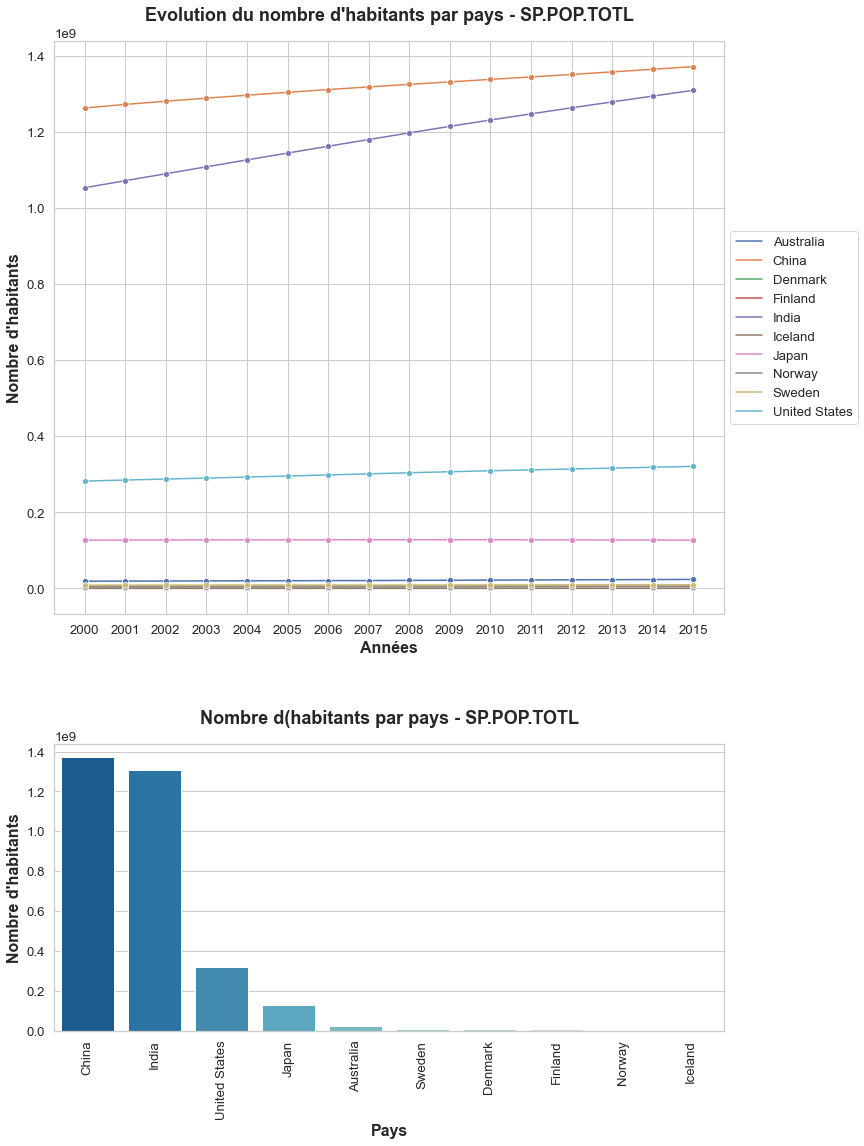

In [102]:
show_evo("SP.POP.TOTL",
         "Evolution du nombre d'habitants par pays",
         "Nombre d'habitants",
         "Années",
         "Nombre d(habitants par pays",
         "Nombre d'habitants",
         "Pays")

> La Chine et l'Inde ont un nombre d'habitants plus élevés que les autres pays de notre sélection. Celles-ci sont en augmentation. Les États-Unis arrivent ensuite en 3ᵉ position.

### Taux d'accroissement

L'indicateur **SP.POP.GROW** est le taux de croissance annuel de la population.

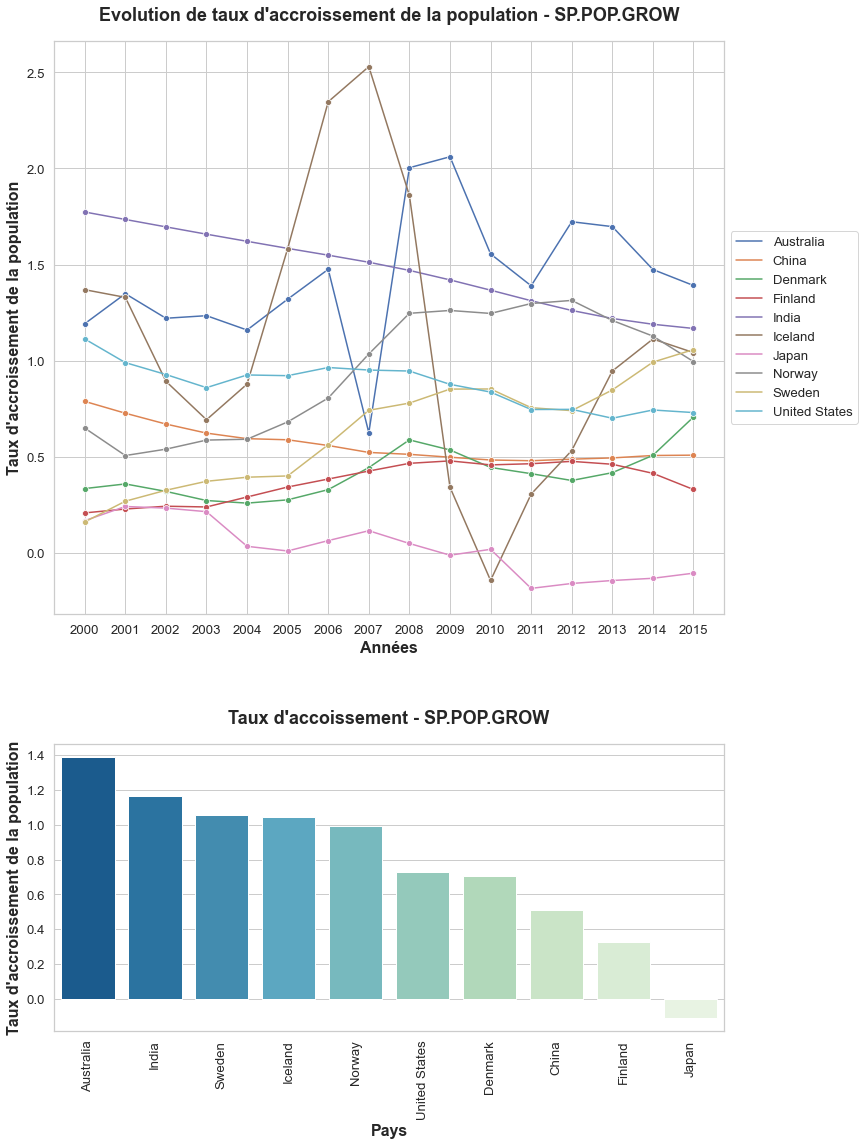

In [103]:
show_evo("SP.POP.GROW",
         "Evolution de taux d'accroissement de la population",
         "Taux d'accroissement de la population",
         "Années",
         "Taux d'accoissement",
         "Taux d'accroissement de la population",
         "Pays")

L'indicateur **SP.POP.1524.TO.UN** correspond à la population totale âgée de 15 à 24 ans. Cette tranche d'âge correspond à nos étudiants cible.

>

>

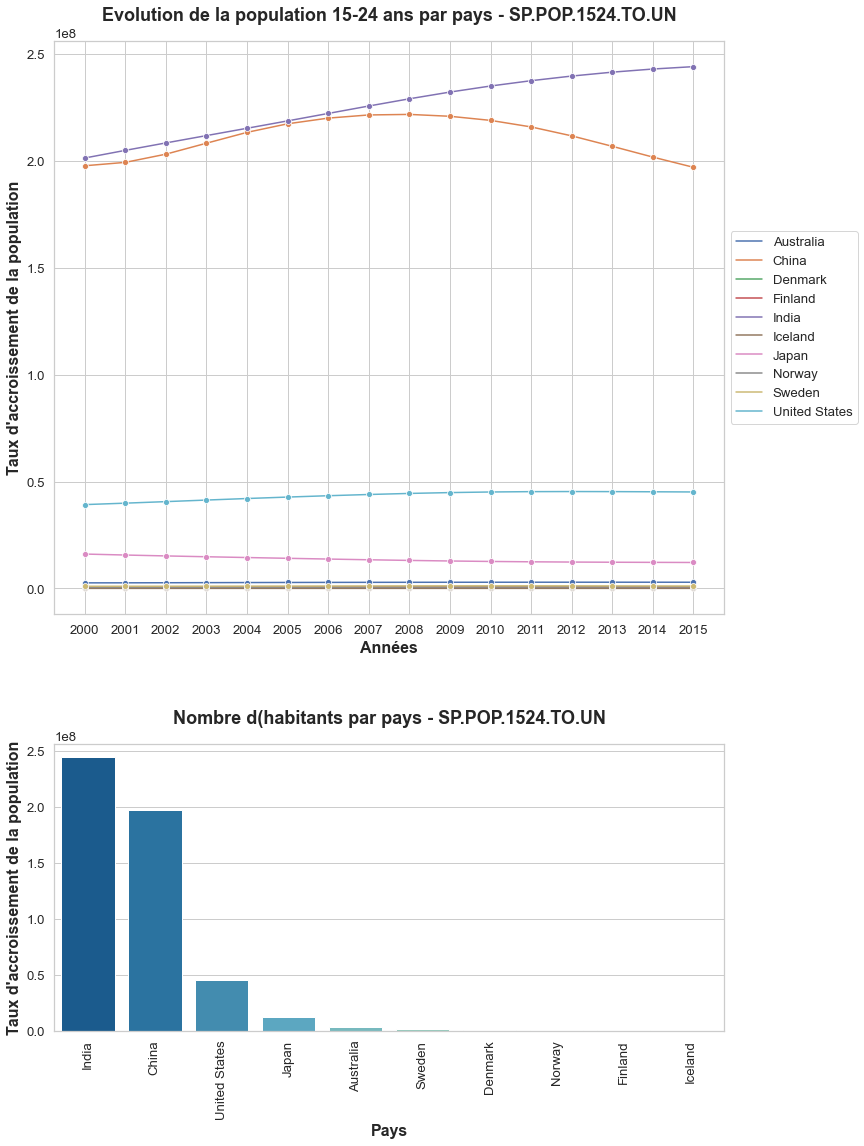

In [104]:
show_evo("SP.POP.1524.TO.UN",
         "Evolution de la population 15-24 ans par pays",
         "Taux d'accroissement de la population",
         "Années",
         "Nombre d(habitants par pays",
         "Taux d'accroissement de la population",
         "Pays")

De cette visualisation, on note que la Chine et L'Inde présentent des effectifs important de 15 à 24 ans. L'Inde affiche une tendance haussière au long des années tandis que la Chine est sur une tendance baissière. Par rapport au nombre d'habitants des autres pays, ils restent tout de même un part de marché conséquent.

## Accéssibilité à internet

Nous souhaitons sélectionner des pays ayant une bonne accessibilité à internet pour nos cours en ligne. Nous analysons donc l'indicateur **IT.NET.USER.P2** qui correspond aux personnes ayant utilisé internet au cours des 3 derniers mois (via ordinateur, mobile, tablette, ...).

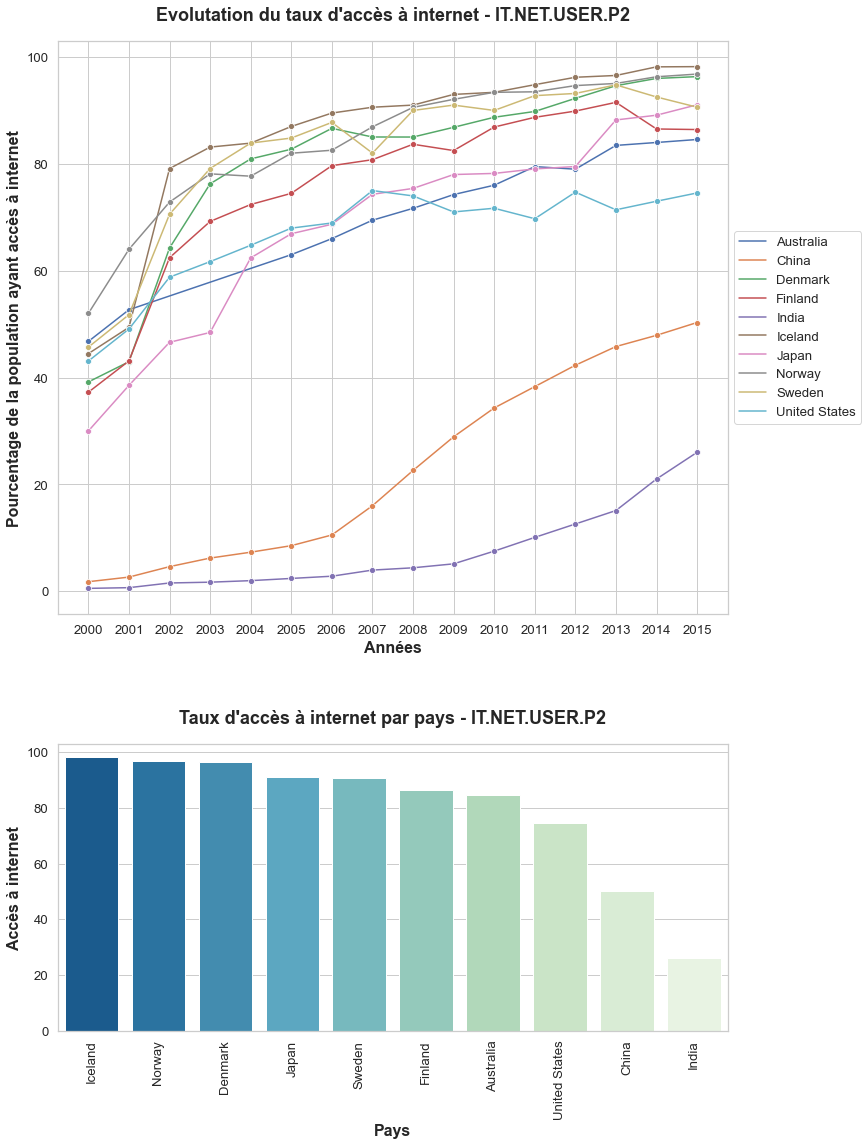

In [105]:
show_evo("IT.NET.USER.P2",
         "Evolutation du taux d'accès à internet",
         "Pourcentage de la population ayant accès à internet",
         "Années",
         "Taux d'accès à internet par pays",
         "Accès à internet",
         "Pays")

On observe que de nombreux pays affichent un taux supérieur à 80%. L'utilisation d'internet en Chine et en Inde est en forte augmentation entre 2008 et 2015. Cela peut supposer un marché émergeant du digital dans ces pays. Nos top 3 des pays sont donc dans une bonne configuration pour l'accès à nos cours en lignes.

## Engagement dans les études

Nos cours étant aussi destinés aux étudiants en lycée, nous allons analyser les indicateurs du secondaire.

### Scolarisation au lycée

L'indicateur **UIS.E.3** correspond au nombre total d'élèves inscrits dans les établissements d'enseignement secondaire supérieur publics et privés, quel que soit leur âge.

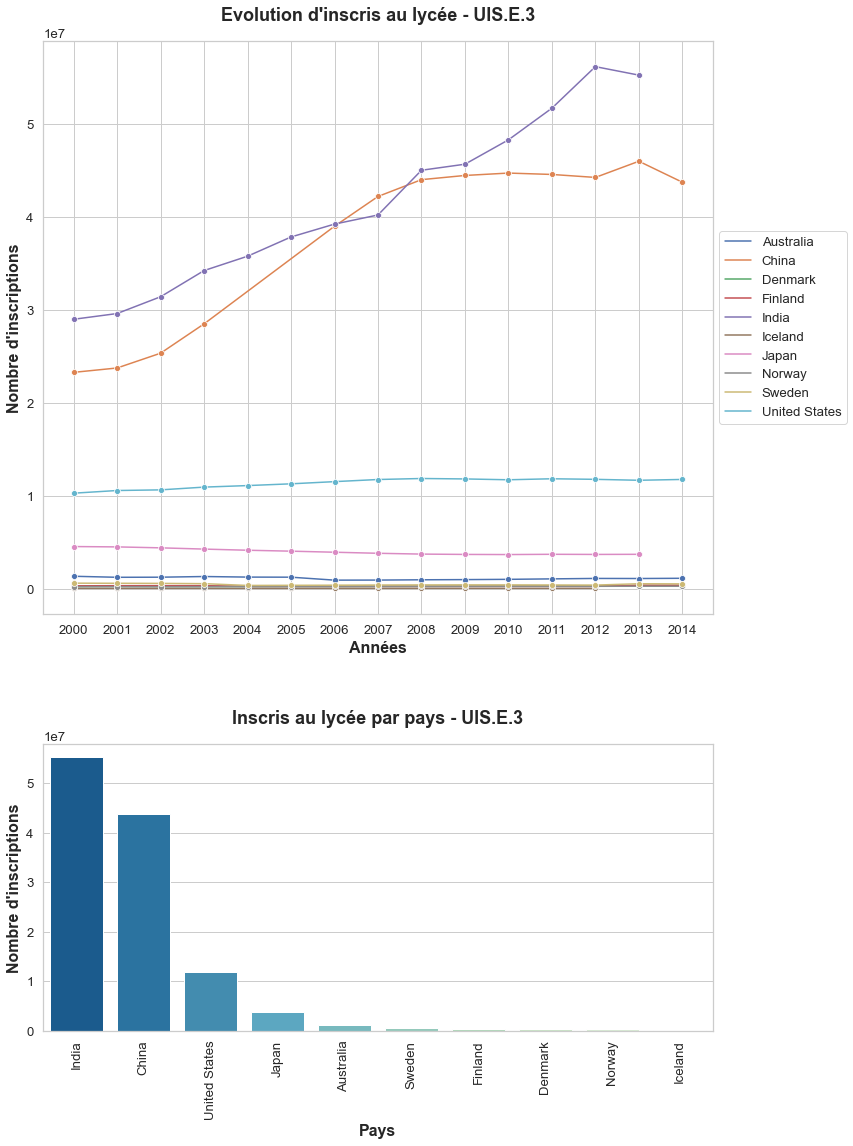

In [106]:
show_evo("UIS.E.3",
         "Evolution d'inscris au lycée",
         "Nombre d'inscriptions",
         "Années",
         "Inscris au lycée par pays",
         "Nombre d'inscriptions",
         "Pays")

> La Chine et l'Inde présentent un nombre d'étudiants important en lycée. L'inde présente une forte augmentation sur ces années. Les États-Unis affichent une progression faible, mais présente un nombre d'inscrits non négligeable.
Ici, le nombre d'étudiants est lié à la taille de la population totale du pays. Ces pays représentent un vivier conséquent de futurs clients de la plateforme.

L'indicateur **SE.SEC.ENRR.UP** correspond l'évolution des inscriptions dans l'enseignement secondaire supérieur, quel que soit l'âge, exprimé en pourcentage de la population totale en âge officiel d'accéder à l'enseignement secondaire supérieur.

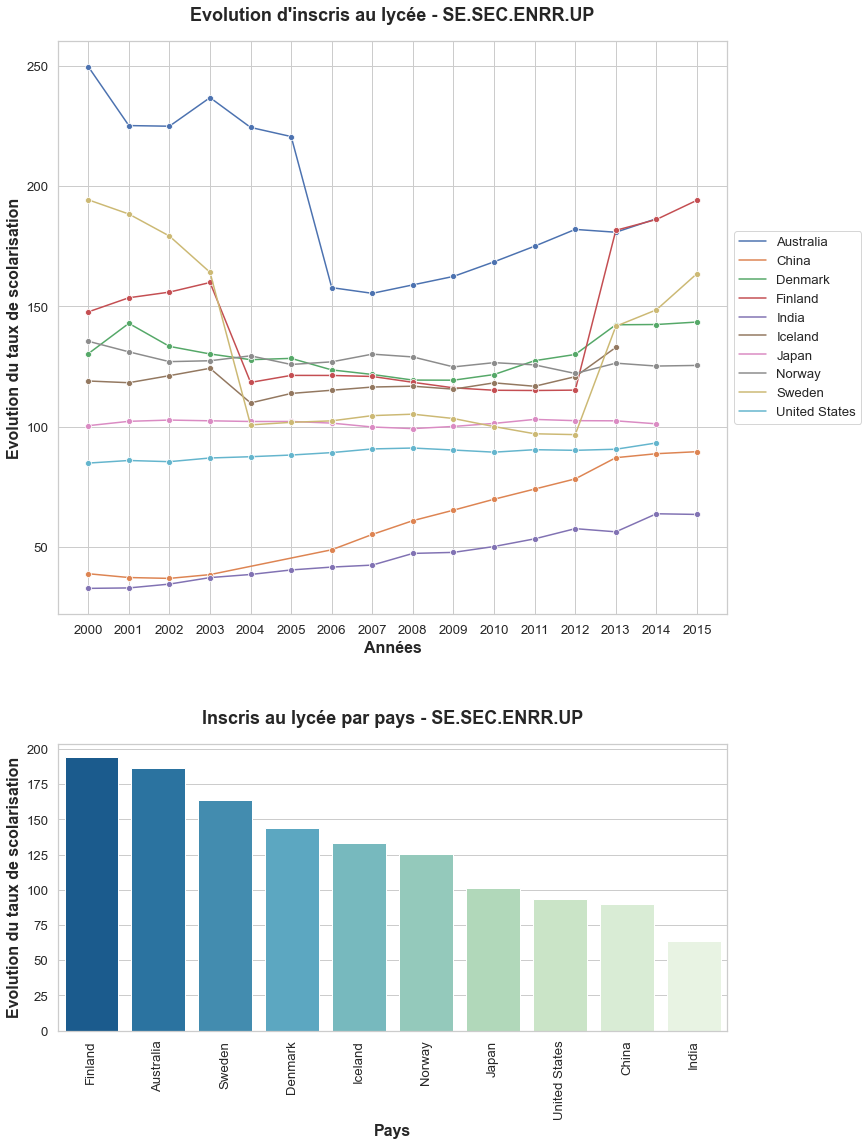

In [107]:
show_evo("SE.SEC.ENRR.UP",
         "Evolution d'inscris au lycée",
         "Evolution du taux de scolarisation",
         "Années",
         "Inscris au lycée par pays",
         "Evolution du taux de scolarisation",
         "Pays")

> Lorsque l'on analyse ensemble les indicateurs **UIS.E.3** et **SE.SEC.ENRR.UP**, on note effectivement que l'Inde et la Chine sont sur des inscriptions au lycée en progression et avec des volumes importants. Le nombres d'inscriptions aux États-Unis est resté constant.

### Etudes post-bac

L'indicateur **SE.TER.ENRR** nous donne le total des inscriptions dans l'enseignement supérieur, quel que soit l'âge, exprimé en pourcentage de la population totale.

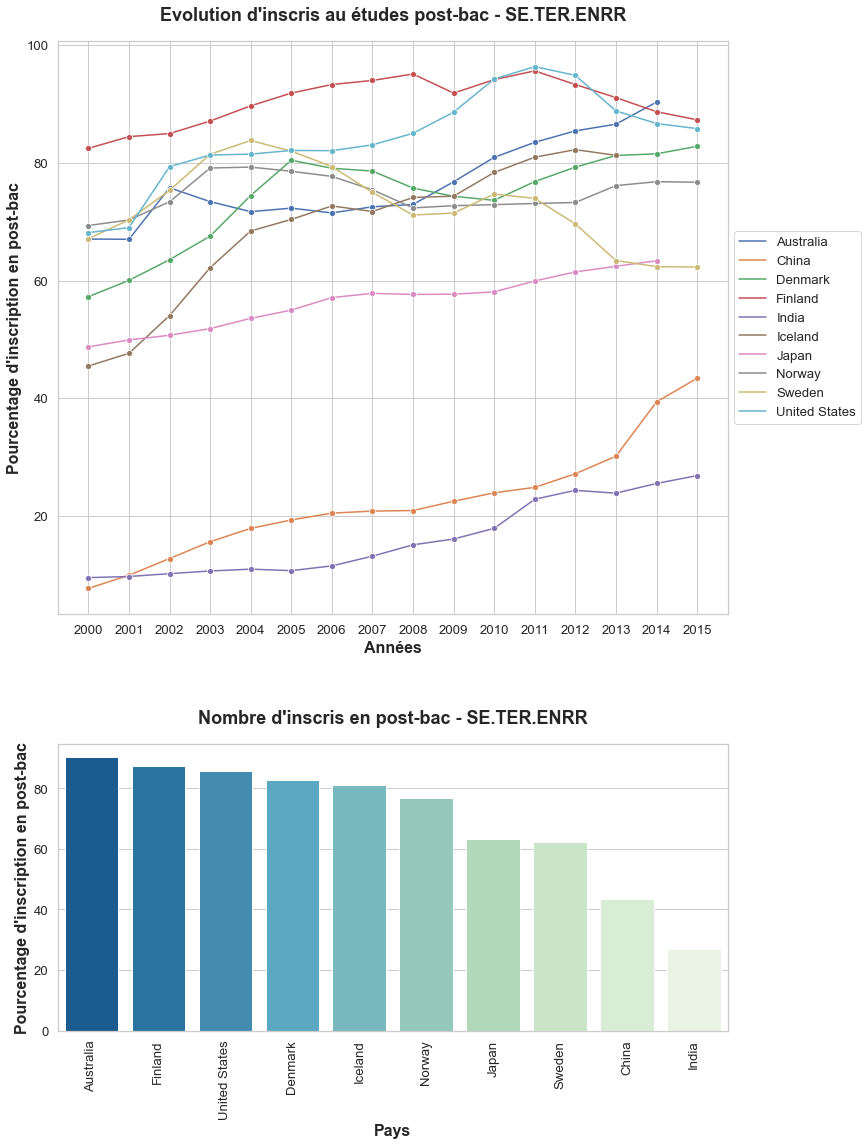

In [108]:
show_evo("SE.TER.ENRR",
         "Evolution d'inscris au études post-bac",
         "Pourcentage d'inscription en post-bac",
         "Années",
         "Nombre d'inscris en post-bac",
         "Pourcentage d'inscription en post-bac",
         "Pays")

> À l'instar du secondaire supérieur, le nombre d'inscriptions en post-bac sont en croissance en Chine et en Inde. D'autres pays présentent, eux aussi, une augmentation constante telle que l'Australie, le Japon et la Norvège. Le nombre d'inscrits est cependant en baisse aux États-Unis, pays classé 3ᵉ dans notre classement.  

### Investissement dans l'éducation

Les indicateurs **SE.SEC.ENRL.TC.ZS** et **UIS.PTRHC.56** correspondent respectivement aux ratios **Rapport élèves-enseignant** dans l'enseignement secondaire et tertiaire.

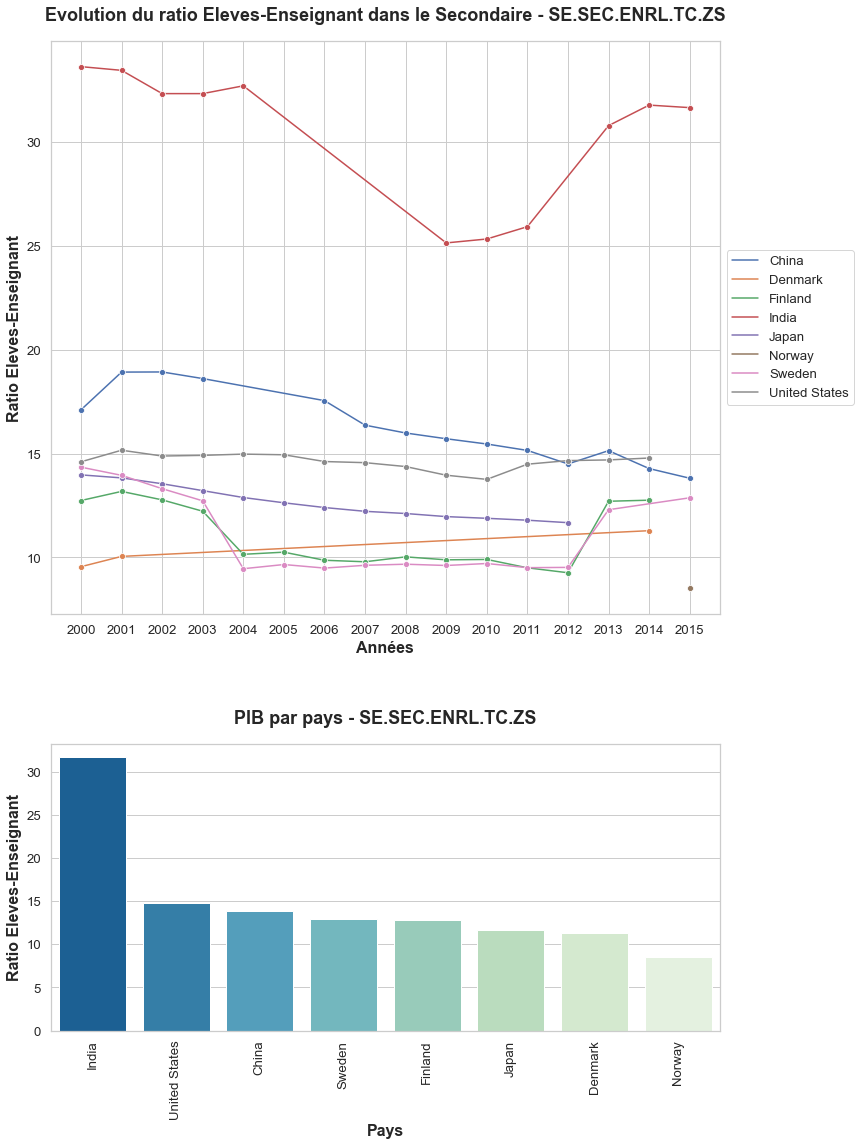

In [109]:
show_evo("SE.SEC.ENRL.TC.ZS",
         "Evolution du ratio Eleves-Enseignant dans le Secondaire",
         "Ratio Eleves-Enseignant",
         "Années",
         "PIB par pays",
         "Ratio Eleves-Enseignant",
         "Pays")

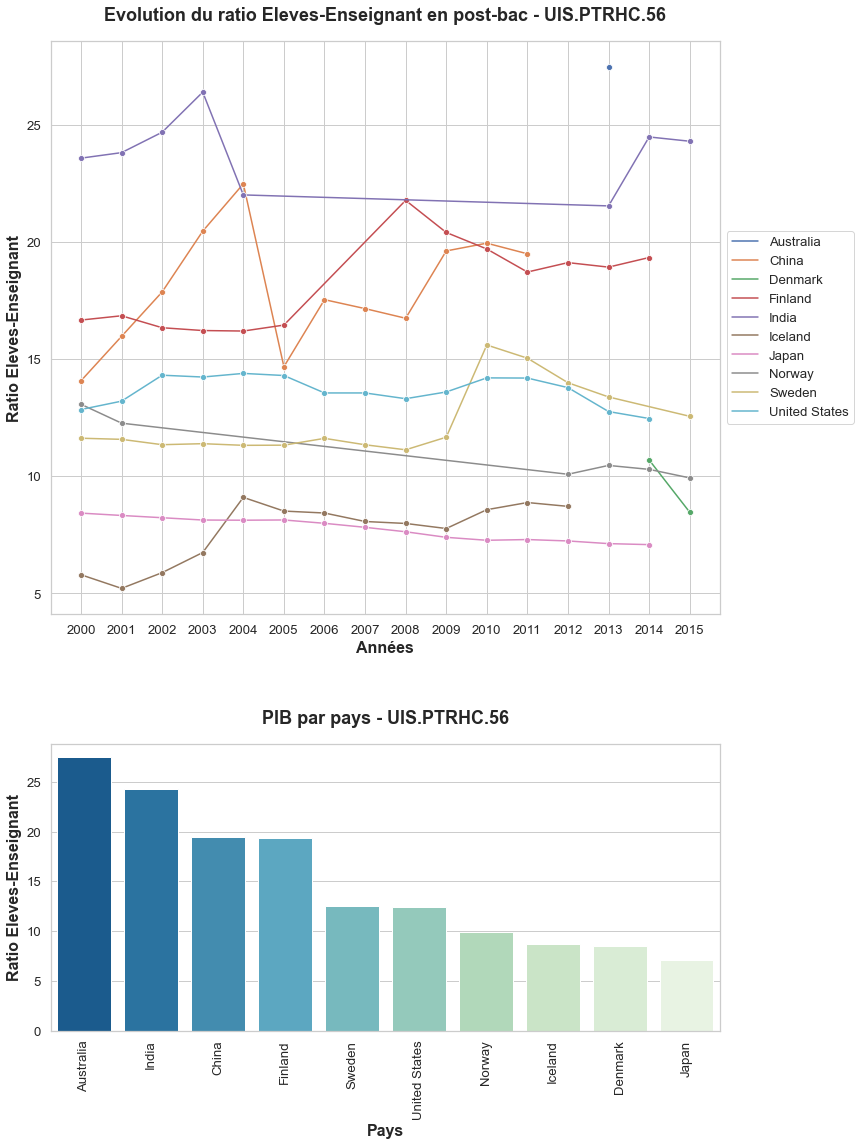

In [110]:
show_evo("UIS.PTRHC.56",
         "Evolution du ratio Eleves-Enseignant en post-bac",
         "Ratio Eleves-Enseignant",
         "Années",
         "PIB par pays",
         "Ratio Eleves-Enseignant",
         "Pays")

> L'Inde est le pays présentant un fort ratio élèves-enseignant à la fois dans les études secondaires et tertiaires. Nous n'avons pas beaucoup de données sur ce ratio dans le secondaire pour la Chine, mais les valeurs connues montrent que le pays un dès ratio les plus bas parmi tous les pays sélectionnés. Concernant le ratio en post-bac, celui-ci est plutôt bien positionné.  
> Les États-Unis ont un ratio assez dans le secondaire comme dans l'enseignement tertiaire.

## Indicateurs de richesse

Notre société propose des cours en ligne payants. Les pays dans lesquels nous irons nous implémenter doivent un pouvoir d'achat correct et financer des cours en lignes.

L'indicateur **NY.GDP.MKTP.CD** est corrélé au PIB en dollars américains courants. Les chiffres en dollars du PIB sont convertis à partir des monnaies nationales en utilisant les taux de change officiels d'une seule année. Il va nous apporter une indication sur la richesse des pays.

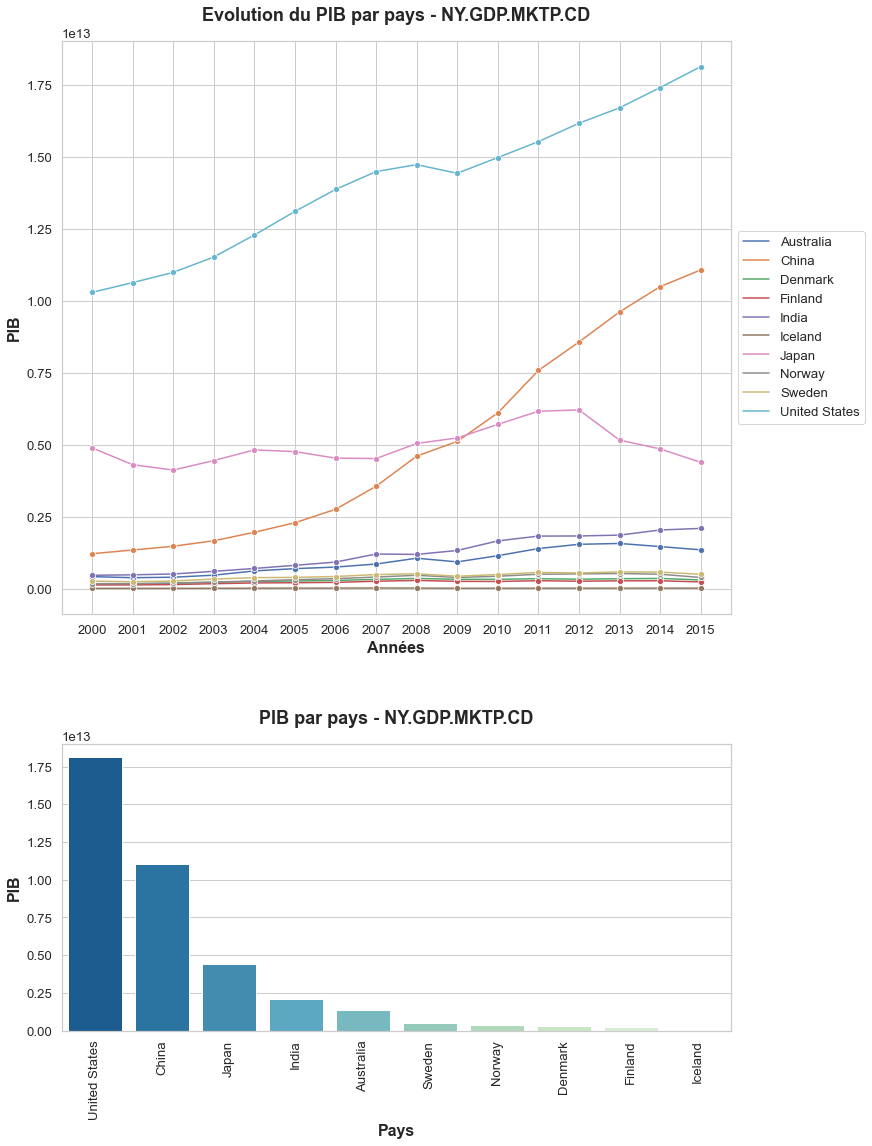

In [111]:
show_evo("NY.GDP.MKTP.CD",
         "Evolution du PIB par pays",
         "PIB",
         "Années",
         "PIB par pays",
         "PIB",
         "Pays")

> Nous constatons que Les États-Unis, la Chine et le Japon ont un facteur de richesse plus important que les autres pays. Les indicateurs sont en augmentation pour la Chine, les États-Unis et l'Inde. 

## Vue globale des pays

Une vue macro des caractéristiques des pays va nous permettre de prioriser les pays parmi ceux sélectionnés.

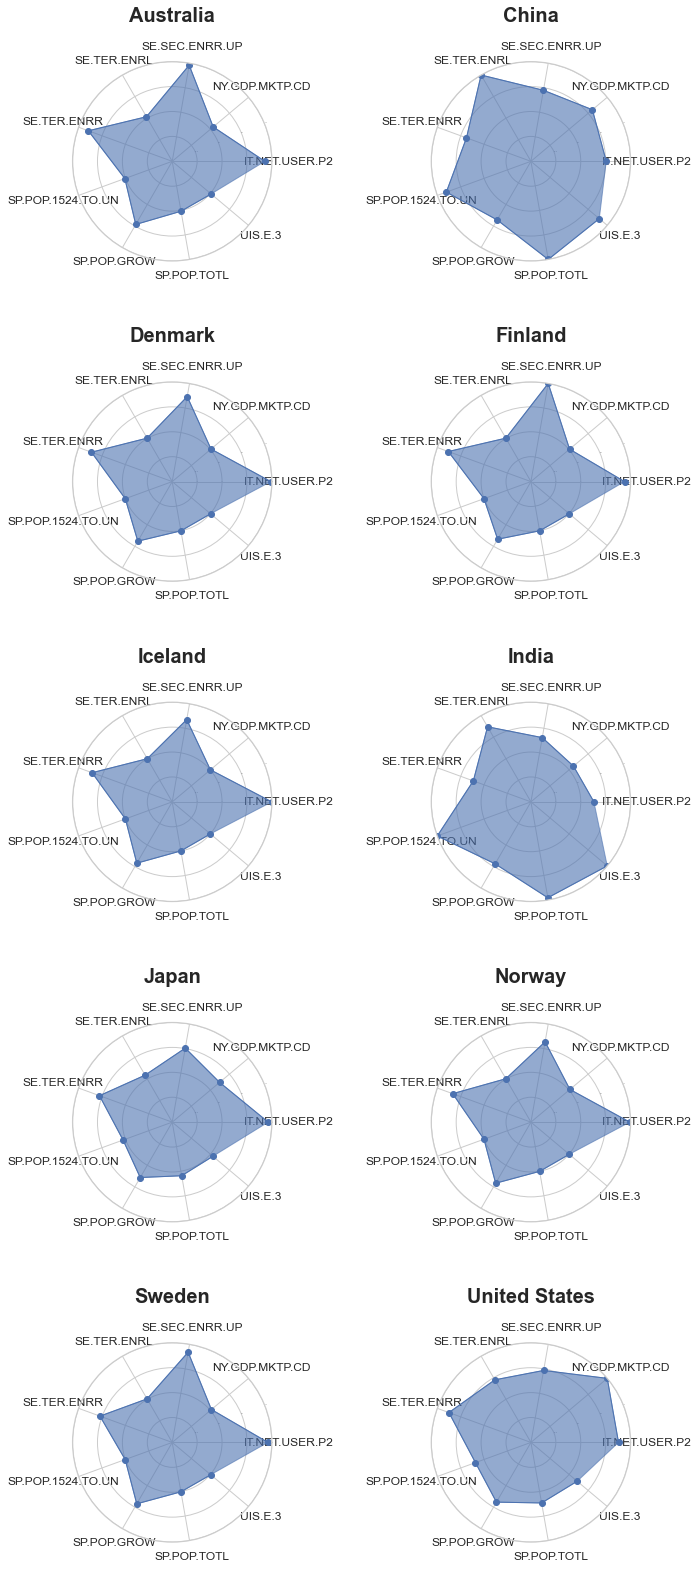

In [112]:
from math import pi

df_data_chart_temp = df_data_pivot.copy()
df_data_chart_temp = (
    df_data_chart_temp-df_data_chart_temp.min())/(df_data_chart_temp.max()-df_data_chart_temp.min())
df_data_chart_temp = df_data_chart_temp.drop(columns=['SE.SEC.ENRL.TC.ZS', 'UIS.PTRHC.56']).reset_index()
df_data_chart_temp = df_data_chart_temp[df_data_chart_temp['Country Name'].isin(list_countries_selected)]

indicators =list(df_data_chart_temp.loc[:,'IT.NET.USER.P2':'UIS.E.3'].columns)
df_values = df_data_chart_temp[df_data_chart_temp.loc[:,'IT.NET.USER.P2':'UIS.E.3'].columns]

indic_nb = len(indicators)
angles = np.linspace(0,2*pi,len(indicators), endpoint=False)

bob_list=[81,30,75,37]

fig = plt.figure(figsize=(10,20))

for i, country in enumerate(df_data_chart_temp['Country Name']) :
    
    ax = fig.add_subplot(5,2,i+1, polar=True)
    plt.xticks(angles, indicators, size=16)
    plt.yticks(color="grey", size=2)
    values = df_values.iloc[i].values
    ax.plot(angles, values, 'o-', linewidth=1, linestyle='solid')
    ax.fill(angles, values, alpha=0.6, color='b')
    ax.set_xticklabels(indicators, fontsize=12)
    ax.set_title(country, size=20)
    plt.ylim(-1,1)
plt.subplots_adjust(top=1.2, wspace = 0.8)

plt.show()

# Conclusion

Les données que nous avions à notre disposition comportaient 3665 indicateurs plus ou moins renseignés pour tous les pays. La stratégie pour analyser ces données a été de les trier par taux de remplissage de valeurs et présélectionner ceux qui avaient un taux supérieur à 60%. Cette première approche a permis de réduire le nombre d'indicateurs. En seconde étape, nous avons analysé, choisi des catégories qui nous semblaient avoir un sens à notre problématique.

L'analyse de chacune de ces catégories, nous a permis d'avoir des informations sur le sens métier des indicateurs :

| Indicateurs | Noms indicateurs |
| --- | --- |
| SP.POP.GROW | Population growth (annual %) |
| SP.POP.TOTL | Population, total |
| NY.GDP.MKTP.CD | GDP (current US dollars) |
| IT.NET.USER.P2 | Internet users (per 100 people) | Inde | Etats-Unis | Danemark | Norvège |
| UIS.E.3 | Enrolment in upper secondary education, both sexes (number) |
| SE.TER.ENRL | Enrolment in tertiary education, all programmes, both sexes (number) |
| SP.POP.1524.TO.UN | Population, ages 15-24, total |
| SE.SEC.ENRR.UP | Gross enrolment ratio, upper secondary, both sexes (%) |
| SE.TER.ENRR | Gross enrolment ratio, tertiary, both sexes (%) |
| SE.SEC.ENRL.TC.ZS | Pupil-teacher ratio in secondary education (headcount basis) |
| UIS.PTRHC.56 | Pupil-teacher ratio in tertiary education (headcount basis) |  

Enfin, nous avons pu sélectionner des indicateurs pertinents et calculer un score à partir de ceux-ci pour établir un top provisoire des pays :

- 1. China
- 2. India
- 3. United States
- 4. Denmark
- 5. Norway
- 6. Finland
- 7. Australia
- 8. Iceland
- 9. Japan
- 10. Sweden

Les données ont été pertinentes pour répondre à notre problématique. Nous avons pu sélectionner des pays candidats. Nous sélectionnons donc les 3 pays suivants :

    1. La Chine
La Chine se place en 1ʳᵉ position. Les indicateurs montrent que le nombre d'habitants est élevé malgré une croissante en diminution. La population de 15-24 ans présente un taux d'accroissement élevé. L'utilisation d'internet est en augmentation avec un pouvoir d'achat en hausse. Les indicateurs d'éducation sont eux bien positionné.

    2. L'Inde
À la seconde position, on retrouve l'Inde. À l'instar de la Chine, le nombre d'habitants est là aussi élevé. L'utilisation d'internet est faible mais en net augmentation. Les étudiants en Lycée et en post-bac sont de plus en plus nombreux, mais le taux de scolarisation reste l'un des plus faibles. Le nombre de professeurs disponibles par rapport aux étudiants est faible. Cela peut engendrer une augmentation en compléments et donc en cours en ligne. Le point faible du pays dans notre cas est le pouvoir d'achat moyen qui reste peu élevé.

    3. Les Etats-Unis
Les États-Unis sont en 3ᵉ position avec un nombre d'habitants important et une croissance plutôt stable, y compris pour les 15-24 ans. Le nombre d'inscris en Lycée et post-bac est élevé avec une très bonne connectivité à internet. Le ratio professeurs-étudiants est bon et le pouvoir d'achat moyen est élevé.

| Indicateurs | Chine | Inde | Etats-Unis | Danemark | Norvège |
| --- | --- | --- | --- | --- | --- |
| Population globale | ++++ | ++++ | ++ | + | + |
| Population cible | +++ | ++++ | ++ | + | + |
| Utilisation d'internet | +++ | ++ | ++++ | ++++ | ++++ |
| Etudes au lycée | +++ | +++ | +++ | ++ | ++ |
| Etudes post-bac | +++ | +++ | ++++ | ++++ | +++ |
| Pouvoir d'achat | ++++ | ++ | ++++ | ++ | ++ |

# Limite de l'étude

Les données nous ont permis de sélectionner des pays cibles. Il est noté que notre étude présente des limites :
- Les données présentent beaucoup de valeurs non renseignées. À cause de ce manque d'information, il existe un risque de passer à côté d'un indicateur décisif.
- Les données manquent d'informations sur l'utilisation des cours et des achats en ligne.
- Nous pourrions cibler des pays dans le but de réutiliser nos ressources existantes et éviter des traductions.
- Une analyse sur des données de concurrences pourrait nous informer sur les parts de marché et définir un taux de pénétration.
- Il serait intéressant d'ajouter à l'étude des indicateurs sur les reconversions professionnelles ou des formations en entreprises.
- L'aspect culturel des pays n'est pas pris en compte (démarche d'implentation, fonctionnement de la société, langue, ...)